In [1]:
# %matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import scipy.stats as stats
import scipy as sp
import matplotlib as mpl
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator, LogLocator, AutoLocator, Locator 

# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 3.0
plt.rcParams['lines.linewidth']= 3.0
mpl.rcParams['mathtext.default'] = 'regular'
plt.rcParams['errorbar.capsize']= 3.0
sns.set_style('ticks')
sns.set_context("paper")

#Size of ticks and width
sztmj=3
sztmm=1.5
wtick=1
#Size of letters (A,B,C)
fontsizeL=16
fontsiz=16
fontsizLeg=18
#Pad between ticks and  values
padsize=2.5

data=pd.read_csv('TADs.csv')


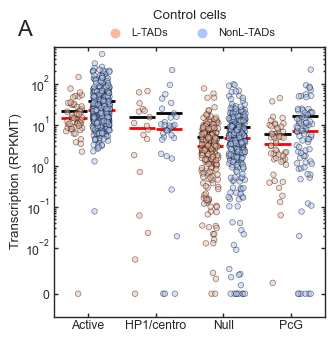

In [2]:
fig = plt.gcf()
fig.set_size_inches(17.8/(2.0*2.54), 17.8/(2.0*2.54))

ax1 = sns.stripplot(x="EpiClass", y="WT_RPKMT", hue="Class", linewidth=0.5,palette="coolwarm_r",data=data,order=["Active","HP1/centro", "Null","PcG"],edgecolor="black", dodge=True,size=4, jitter=0.25, alpha = 0.5)
ax1 = sns.boxplot(x="EpiClass", y="WT_RPKMT", hue="Class",data=data, palette="coolwarm_r",order=["Active","HP1/centro", "Null","PcG"], dodge=True, showmeans=True, meanline=True, showbox=False, showcaps=False,showfliers=False,medianprops={"visible":True,"color":"red","ls":'-',"lw":"2"}, whiskerprops={"visible":False},meanprops={"color":"k","ls":'-',"lw":"2"})

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles[0:2], labels[0:2],
               loc='center',
               fontsize='small',
               handletextpad=0.5,
               bbox_to_anchor=(.5, 1.05), frameon =False, ncols =2)



lgd.legend_handles[0]._sizes = [40]
lgd.legend_handles[1]._sizes = [40]
ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(50.0))
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(10.0))
ax1.xaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax1.xaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
ax1.yaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax1.yaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
plt.ylabel("Transcription (RPKMT)", labelpad =2.0)
plt.xlabel("")
ax1.set_title("Control cells", pad = 20)
ax1.text(-0.08, 1.1, "A", transform=ax1.transAxes,
      fontsize=fontsizeL, va='top', ha='right')
plt.yscale('symlog', subs =np.arange(2, 10, 1), linthresh =0.01, base=10, linscale = 1.0)
plt.ylim(bottom=-0.005)
plt.ylim(top=800)
#plt.ylim(top=40)
plt.savefig('WT_RPKMT_Merge_strip_log.png', format='png', dpi=1200)
#data.groupby(['Class','EpiClass']).WT_RPKMT.describe(percentiles=[0.68])
#print('Median') 
#data.groupby(['Class','EpiClass']).WT_RPKMT.median()


Pearson: -0.12215268606724218
P value (Pearson): 2.817934127811284e-05
Spearman: -0.16536509404038843
P value (Spearman): 1.2922479297660277e-08


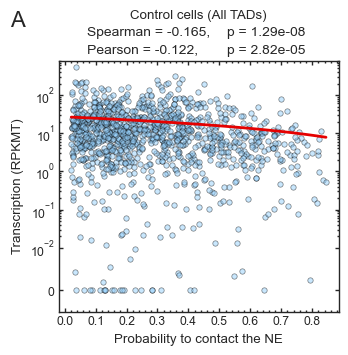

In [3]:
a3=sns.lmplot(x="WT_Probability_NE0.2", y="WT_RPKMT", data=data, palette="coolwarm_r", aspect=1.0, height=3.503, line_kws={'color': 'xkcd:red','lw': 2}, scatter_kws = {
  "s": 15, 'color': 'xkcd:light blue', 'edgecolors': 'black', 'linewidths': .5, 'alpha': 0.5}, ci=None )

ax3 = plt.gca()


ax3.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax3.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.02))
ax3.xaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax3.xaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
ax3.yaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax3.yaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)

x3=data['WT_Probability_NE0.2']
y3=data['WT_RPKMT']
r3, p3 = stats.pearsonr(x3, y3, alternative='two-sided')
rho3, pval3 = stats.spearmanr(x3, y3, alternative='two-sided')

def annotate(data, **kws):
    
    ax3.text(.1, 1.1, 'Spearman = {:.3f},'.format(rho3),
            transform=ax3.transAxes, fontsize=10)
    ax3.text(.6, 1.1, 'p = {:.2e}'.format(pval3),
            transform=ax3.transAxes, fontsize=10)
    ax3.text(.1, 1.03, 'Pearson = {:.3f},'.format(r3),
            transform=ax3.transAxes, fontsize=10)
    ax3.text(.6, 1.03, 'p = {:.2e}'.format(p3),
            transform=ax3.transAxes, fontsize=10)
a3.map_dataframe(annotate)

print ('Pearson:', r3)
print ('P value (Pearson):', p3)
print ('Spearman:', rho3)
print ('P value (Spearman):', pval3)
ax3.text(-0.12, 1.2, "A", transform=ax3.transAxes,
      fontsize=fontsizeL, va='top', ha='right')

ax3.set_title("Control cells (All TADs)",pad=30 )



plt.yscale('symlog', subs =np.arange(2, 10, 1), linthresh =0.01, base=10, linscale = 1.0)

plt.ylabel("Transcription (RPKMT)")
plt.xlabel("Probability to contact the NE")
plt.ylim(bottom=-0.005)
plt.ylim(top=800)
plt.savefig('WT_RPKMT_regr_log.png', format='png', dpi=1200)
#print(x3,y3)


count       mean        std       min        50%  \
Class     EpiClass                                                       
L-TADs    Active       54.0  21.784163  22.681339  0.000000  14.416936   
          HP1/centro   18.0  16.215168  20.078318  0.000000   9.486407   
          Null        228.0   5.232233   8.183134  0.000000   3.103107   
          PcG          50.0   5.999319   7.968070  0.000000   3.523986   
NonL-TADs Active      440.0  37.638378  47.597601  0.027498  23.161996   
          HP1/centro   34.0  20.063469  38.714100  0.000000   9.263923   
          Null        264.0   9.048181  13.205338  0.000000   4.756722   
          PcG          81.0  16.473618  30.160648  0.000000   7.427206   

                            68%         max  
Class     EpiClass                           
L-TADs    Active      20.680445  138.611154  
          HP1/centro  20.379916   66.118957  
          Null         5.314792   76.857357  
          PcG          5.970538   42.295570  
NonL-TADs Active      33.245245  486.928444  
          HP1/centro  12.175145  210.425580  
          Null         8.559826   90.159210  
          PcG         12.493356  213.342020

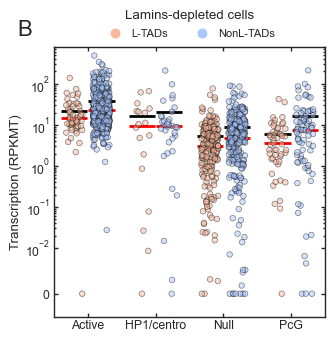

In [4]:
fig = plt.gcf()
fig.set_size_inches(17.8/(2.0*2.54), 17.8/(2.0*2.54))


ax41 = sns.stripplot(x="EpiClass", y="Mut_RPKMT", hue="Class", linewidth=0.5,palette="coolwarm_r",data=data,order=["Active","HP1/centro", "Null","PcG"],edgecolor="black", dodge=True,size=4,jitter=0.25, alpha = 0.5)
ax41=sns.boxplot(x="EpiClass", y="Mut_RPKMT",hue="Class",data=data, palette="coolwarm_r" ,order=["Active","HP1/centro", "Null","PcG"], dodge=True, showmeans=True, meanline=True, showbox=False, showcaps=False,showfliers=False,medianprops={"visible": True,"color":"red","ls":'-',"lw":"2"}, whiskerprops={"visible":False},meanprops={"color":"k","ls":'-',"lw":"2"})
handles, labels = ax41.get_legend_handles_labels()
lgd = ax41.legend(handles[0:2], labels[0:2],
               loc='center',
               fontsize='small',
               handletextpad=0.5,
               bbox_to_anchor=(.5, 1.05), frameon =False, ncols =2)
lgd.legend_handles[0]._sizes = [40]
lgd.legend_handles[1]._sizes = [40]
ax41.yaxis.set_major_locator(mpl.ticker.MultipleLocator(50.0))
ax41.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(10.0))
ax41.xaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax41.xaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
ax41.yaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax41.yaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
plt.ylabel("Transcription (RPKMT)", labelpad =2.0)
plt.xlabel("")
ax41.set_title("Lamins-depleted cells", pad = 20)
ax41.text(-0.08, 1.1, "B", transform=ax41.transAxes,
      fontsize=fontsizeL, va='top', ha='right')
plt.yscale('symlog', subs =np.arange(2, 10, 1), linthresh =0.01, base=10, linscale = 1.0)
plt.ylim(bottom=-0.005)
plt.ylim(top=800)
#plt.ylim(top=40)
plt.savefig('Mut_RPKMT_Merge_strip_log.png', format='png', dpi=1200)
data.groupby(['Class','EpiClass']).Mut_RPKMT.describe(percentiles=[0.68])
#print('Median') 
#data.groupby(['Class','EpiClass']).WT_RPKMT.median()

,count,mean,std,min,50%,68%,max
Bin_ALL_TADs,,,,,,,
1,195.0,26.273542,54.354633,0.0,12.029302,19.697783,530.990241
2,195.0,21.455854,27.114760,0.0,12.509731,20.613298,151.284168
3,195.0,17.365299,23.726999,0.0,9.443922,15.774604,160.832482
4,195.0,25.809582,38.221625,0.0,12.965066,22.595388,242.338774
5,195.0,22.233490,40.392585,0.0,8.511016,15.949090,313.313202
6,194.0,9.964059,17.764054,0.0,4.949659,8.437665,172.524820


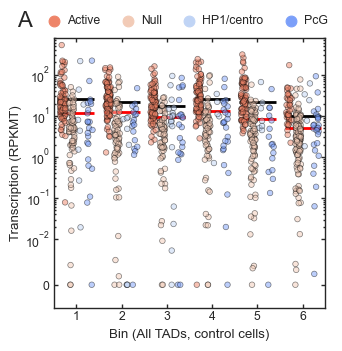

In [5]:
fig = plt.gcf()
fig.set_size_inches(17.8/(2.0*2.54), 17.8/(2.0*2.54))


ax5=sns.boxplot(x="Bin_ALL_TADs", y="WT_RPKMT",data=data, palette="coolwarm_r", showmeans=True, meanline=True, showbox=False, showcaps=False,showfliers=False,medianprops={"visible": True,"color":"red","ls":'-',"lw":"2"}, whiskerprops={"visible":False},meanprops={"color":"k","ls":'-',"lw":"2"})
ax5 =sns.stripplot(x="Bin_ALL_TADs", y="WT_RPKMT", data=data,linewidth=0.5,palette="coolwarm_r",edgecolor="black",size=4,jitter=0.25, hue="EpiClass",dodge=True, alpha = 0.5)


sns.move_legend(
    ax5, "lower center",
    bbox_to_anchor=(.5, 1), title=None, ncol=4,handlelength=0.5,handleheight=0.5, frameon=False)


ax5.xaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax5.xaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
ax5.yaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax5.yaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
plt.ylabel("Transcription (RPKMT)",labelpad=2.0)
plt.xlabel("Bin (All TADs, control cells)")
#ax5.set_title("All TADs (control cells)")
ax5.text(-0.08, 1.1, "A", transform=ax5.transAxes,
      fontsize=fontsizeL, va='top', ha='right')
plt.yscale('symlog', subs =np.arange(2, 10, 1), linthresh =0.01, base=10, linscale = 1.0)
plt.ylim(bottom=-0.005)
plt.ylim(top=800)
plt.savefig('WT_RPKMT_bin_ALLTAD_strip_log.png', format='png', dpi=1200)
#data.groupby(['EpiClass','Bin_ALL_TADs']).WT_RPKMT.describe(percentiles=[0.68])
data.groupby('Bin_ALL_TADs').WT_RPKMT.describe(percentiles=[0.68])
#data.groupby('Bin_ALL_TADs').Mut_RPKMT.describe(percentiles=[0.68])
#data.groupby('Bin_ALL_TADs').WT_RPKMT.sem()

,count,mean,std,min,50%,68%,max
Bin_NonLTADs,,,,,,,
1.0,137.0,30.906482,61.383809,0.0,13.760756,20.604487,530.990241
2.0,137.0,23.041021,31.731436,0.0,12.614042,23.515927,220.986989
3.0,137.0,19.372790,23.123057,0.0,11.578195,19.629016,145.807480
4.0,137.0,18.657526,25.214785,0.0,10.758402,17.826070,160.832482
5.0,137.0,31.588501,43.216029,0.0,15.505255,25.911348,242.338774
6.0,134.0,30.820010,46.835295,0.0,15.247321,26.734900,313.313202


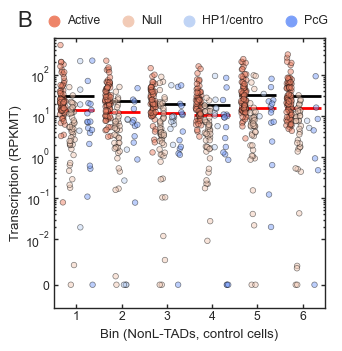

In [6]:
fig = plt.gcf()
fig.set_size_inches(17.8/(2.0*2.54), 17.8/(2.0*2.54))
ax7=sns.boxplot(x="Bin_NonLTADs", y="WT_RPKMT",data=data, palette="coolwarm_r", showmeans=True, meanline=True, showbox=False, showcaps=False,showfliers=False,medianprops={"visible": True,"color":"red","ls":'-',"lw":"2"}, whiskerprops={"visible":False},meanprops={"color":"k","ls":'-',"lw":"2"})
ax7 =sns.stripplot(x="Bin_NonLTADs", y="WT_RPKMT", data=data,linewidth=0.5,palette="coolwarm_r",edgecolor="black",size=4,jitter=0.25, hue="EpiClass",dodge=True, alpha = 0.5)

sns.move_legend(
    ax7, "lower center",
    bbox_to_anchor=(.5, 1), title=None, ncol=4,handlelength=0.5,handleheight=0.5, frameon=False)

ax7.yaxis.set_major_locator(mpl.ticker.MultipleLocator(50.0))
ax7.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(10.0))
ax7.xaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax7.xaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
ax7.yaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax7.yaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
plt.ylabel("Transcription (RPKMT)", labelpad =2.0)
plt.xlabel("Bin (NonL-TADs, control cells)")
labels = ['1', '2', '3', '4', '5', '6']
ax7.set_xticklabels(labels)
ax7.text(-0.08, 1.1, "B", transform=ax7.transAxes,
      fontsize=fontsizeL, va='top', ha='right')
plt.yscale('symlog', subs =np.arange(2, 10, 1), linthresh =0.01, base=10, linscale = 1.0)
plt.ylim(bottom=-0.005)

plt.ylim(top=800)
#plt.ylim(top=40)
plt.savefig('WT_RPKMT_bin_NonLTAD_strip_log.png', format='png', dpi=1200)
data.groupby('Bin_NonLTADs').WT_RPKMT.describe(percentiles=[0.68])
#data.groupby(['EpiClass','Bin_NonLTADs']).WT_RPKMT.describe(percentiles=[0.68])
#data.groupby('Bin_NonLTADs').Mut_RPKMT.describe(percentiles=[0.68])
#data.groupby('Bin_NonLTADs').WT_RPKMT.median()
#data.groupby('Bin_NonLTADs').WT_RPKMT.sem()
#data.groupby('Bin_NonLTADs').Mut_RPKMT.sem()

In [7]:
#fig = plt.gcf()
#fig.set_size_inches(17.8/(2.0*2.54), 17.8/(2.0*2.54))
#data11=data.groupby('EpiClass')
#yerrbar1=data11['Mut_RPKMT'].sem()
#print('SEM')
#print(yerrbar1)
#print('Mean')
#print(data11['Mut_RPKMT'].mean()) 
#ax11 = sns.barplot(x="EpiClass", y="Mut_RPKMT", data=data, palette="coolwarm_r", yerr=yerrbar1,order=["Active","HP1/centro","Null","PcG"],edgecolor="black",lw=1,ci=None, alpha=0.8)
#plt.ylabel("Mean transcription (RPKMT)")
#plt.xlabel("")
#ax11.set_title("Lamins-depleted cells")
#ax11.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5.0))
#ax11.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1.0))
#ax11.xaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
#ax11.xaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
#ax11.yaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
#ax11.yaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
#plt.savefig('Mut_RPKMT_ALLTADs.png', format='png', dpi=1200)


In [8]:
#fig = plt.gcf()
#fig.set_size_inches(17.8/(2.0*2.54), 17.8/(2.0*2.54))
#data11=data.groupby('EpiClass')
#print(data11)
#yerrbar1=data11['Mut_RPKMTL'].sem()
#print('SEM')
#print(yerrbar1)
#print('Mean')
#print(data11['Mut_RPKMTL'].mean())
#ax12 = sns.barplot(x="EpiClass", y="Mut_RPKMTL", data=data, palette="coolwarm_r", order=["Active","HP1/centro","Null","PcG"],yerr=yerrbar1,edgecolor="black",lw=1,ci=None, alpha=0.8)
#plt.ylabel("Mean transcription (RPKMTL)")
#plt.xlabel("")
#ax12.set_title("Lamins-depleted cells")
#ax12.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5.0))
#ax12.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1.0))
#ax12.xaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
#ax12.xaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
#ax12.yaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
#ax12.yaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)

#plt.savefig('Mut_RPKMTL_ALLTADs.png', format='png', dpi=1200)

,count,mean,std,min,50%,68%,max
Bin_LTADs,,,,,,,
1.0,58.0,7.794256,11.574293,0.000000,4.379025,6.754260,61.561244
2.0,58.0,12.789952,23.173322,0.000000,5.104855,9.430604,146.536216
3.0,58.0,8.053811,12.537189,0.032261,3.352936,6.430658,66.793497
4.0,58.0,8.436298,13.050707,0.003264,4.271375,6.247874,61.840135
5.0,58.0,6.318560,6.832827,0.004554,3.904408,7.281564,34.376877
6.0,60.0,6.993966,11.542250,0.002374,3.746006,6.633935,77.047143


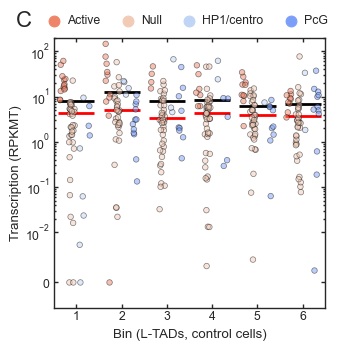

In [9]:
fig = plt.gcf()
fig.set_size_inches(17.8/(2.0*2.54), 17.8/(2.0*2.54))
ax55=sns.boxplot(x="Bin_LTADs", y="WT_RPKMT",data=data, palette="coolwarm_r", showmeans=True, meanline=True, showbox=False, showcaps=False,showfliers=False,medianprops={"visible": True,"color":"red","ls":'-',"lw":"2"}, whiskerprops={"visible":False},meanprops={"color":"k","ls":'-',"lw":"2"})
ax55 =sns.stripplot(x="Bin_LTADs", y="WT_RPKMT", data=data,linewidth=0.5,palette="coolwarm_r",edgecolor="black",size=4,jitter=0.25, hue="EpiClass",dodge=True, alpha = 0.5)


sns.move_legend(
    ax55, "lower center",
    bbox_to_anchor=(.5, 1), title=None, ncol=4,handlelength=0.5,handleheight=0.5, frameon=False)


ax55.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10.0))
ax55.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.0))
ax55.xaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax55.xaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
ax55.yaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax55.yaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
plt.ylabel("Transcription (RPKMT)", labelpad = 2.0)
plt.xlabel("Bin (L-TADs, control cells)")

ax55.text(-0.08, 1.1, "C", transform=ax55.transAxes,
      fontsize=fontsizeL, va='top', ha='right')
labels = ['1', '2', '3', '4', '5', '6']
ax55.set_xticklabels(labels)
plt.yscale('symlog', subs =np.arange(2, 10, 1), linthresh =0.01, base=10, linscale = 1.0)
plt.ylim(bottom=-0.005)
plt.ylim(top=200)
#plt.ylim(top=20)
plt.savefig('WT_RPKMT_bin_LTAD_strip_log.png', format='png', dpi=1200)
data.groupby('Bin_LTADs').WT_RPKMT.describe(percentiles=[0.68])
#data.groupby('Bin_LTADs').Mut_RPKMT.describe(percentiles=[0.68])
#data.groupby('Bin_LTADs').WT_RPKMT.median()
#data.groupby('Bin_LTADs').WT_RPKMT.sem()
#data.groupby('Bin_LTADs').Mut_RPKMT.sem()
#data.groupby(['EpiClass','Bin_LTADs']).WT_RPKMT.describe(percentiles=[0.68])

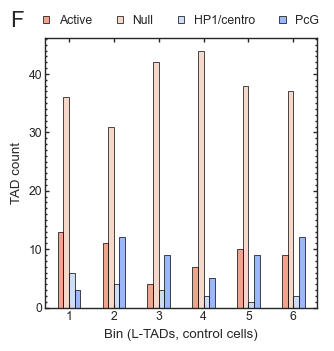

In [10]:
fig = plt.gcf()
fig.set_size_inches(17.8/(2.0*2.54), 17.8/(2.0*2.54))
ax51 = sns.histplot(x="Bin_LTADs", data=data, hue="EpiClass", stat="count",palette="coolwarm_r", discrete=True, multiple="dodge", shrink=0.5,linewidth=0.5,edgecolor="black")

sns.move_legend(
    ax51, "lower center",
    bbox_to_anchor=(.5, 1), title=None, ncol=4,handlelength=0.5,handleheight=0.5, frameon=False)

ax51.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10.0))
ax51.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1.0))
ax51.xaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax51.xaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
ax51.yaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax51.yaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)

plt.xlabel("Bin (L-TADs, control cells)")
plt.ylabel("TAD count")
ax51.text(-0.08, 1.1, "F", transform=ax51.transAxes,
      fontsize=fontsizeL, va='top', ha='right')
plt.savefig('WT_RPKMT_bin_LTAD_strip_count.png', format='png', dpi=1200)


Pearson: 0.03410282428042382
P value (Pearson): 0.2439829923530846
Spearman: 0.0895016397857894
P value (Spearman): 0.0021913470807668114


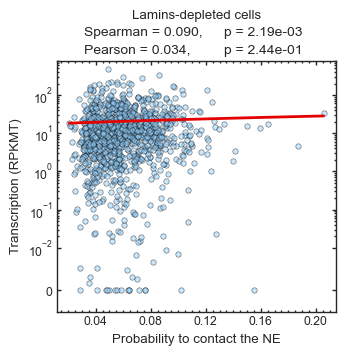

In [11]:
a31=sns.lmplot(x="Mutant_Probability_NE0.2", y="Mut_RPKMT", data=data, ci=None ,palette="coolwarm_r" ,line_kws={'color': 'xkcd:red','lw': 2},scatter_kws = {
   "s": 15, 'color': 'xkcd:light blue','edgecolors': 'black', 'linewidths': .5, 'alpha': 0.5}, aspect=1.0, height=3.503 )
ax31 = plt.gca()
ax31.yaxis.set_major_locator(mpl.ticker.MultipleLocator(50.0))
ax31.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(10.0))
ax31.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.04))
ax31.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.005))
ax31.xaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax31.xaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
ax31.yaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax31.yaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)

sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
x31=data['Mutant_Probability_NE0.2']
y31=data['Mut_RPKMT']
r31, p31 = stats.pearsonr(x31, y31, alternative='two-sided')
rho31, pval31 = stats.spearmanr(x31, y31, alternative='two-sided')

def annotate(data, **kws):
    
    
    
    ax31.text(.1, 1.1, 'Spearman = {:.3f},'.format(rho31),
            transform=ax31.transAxes, fontsize=10)
    ax31.text(.6, 1.1, 'p = {:.2e}'.format(pval31),
            transform=ax31.transAxes, fontsize=10)
    ax31.text(.1, 1.03, 'Pearson = {:.3f},'.format(r31),
            transform=ax31.transAxes, fontsize=10)
    ax31.text(.6, 1.03, 'p = {:.2e}'.format(p31),
            transform=ax31.transAxes, fontsize=10)
    
    
    
a31.map_dataframe(annotate)
print ('Pearson:', r31)
print ('P value (Pearson):', p31)
print ('Spearman:', rho31)
print ('P value (Spearman):', pval31)


plt.yscale('symlog', subs =np.arange(2, 10, 1), linthresh =0.01, base=10, linscale = 1.0)
ax31.set_title("Lamins-depleted cells",pad=30.0 )
plt.ylabel("Transcription (RPKMT)")
plt.xlabel("Probability to contact the NE")
plt.ylim(bottom=-0.005)
plt.ylim(top=800)
plt.savefig('Mut_RPKMT_regr_log.png', format='png', dpi=1200)

Pearson: 0.006132396282194887
P value (Pearson): 0.8340983484944396
Spearman: 0.06484491156069024
P value (Spearman): 0.026619612940002736


,count,mean,std,min,50%,68%,max
Bin_ALL_TADs,,,,,,,
1,195.0,20.499642,40.475651,0.0,10.030004,16.666102,418.911825
2,195.0,17.718860,24.654884,0.0,9.824820,18.233759,138.514553
3,195.0,13.605470,17.652564,0.0,7.055927,13.447947,135.503878
4,195.0,20.087248,30.512989,0.0,10.846208,16.785217,218.019337
5,195.0,18.663734,32.342243,0.0,7.893962,15.343452,230.247686
6,194.0,6.809646,14.520825,0.0,2.733680,5.121743,169.494409


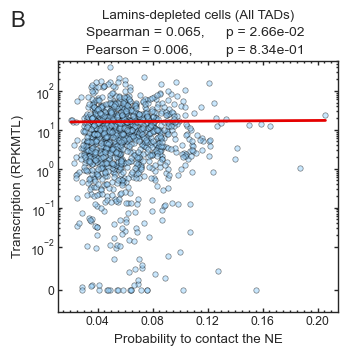

In [12]:
a32=sns.lmplot(x="Mutant_Probability_NE0.2", y="Mut_RPKMTL", data=data, ci=None, palette="coolwarm_r" ,line_kws={'color': 'xkcd:red','lw': 2},scatter_kws = {
   "s": 15, 'color': 'xkcd:light blue','edgecolors': 'black', 'linewidths': .5, 'alpha': 0.5}, aspect=1.0, height=3.503)
ax32 = plt.gca()
plt.ylabel("Transcription (RPKMTL)")
plt.xlabel("Probability to contact the NE")
ax32.yaxis.set_major_locator(mpl.ticker.MultipleLocator(50.0))
ax32.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(10.0))
ax32.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.04))
ax32.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.005))
ax32.xaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax32.xaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
ax32.yaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax32.yaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)

sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
x32=data['Mutant_Probability_NE0.2']
y32=data['Mut_RPKMTL']
r32, p32 = stats.pearsonr(x32, y32, alternative='two-sided')
rho32, pval32 = stats.spearmanr(x32, y32, alternative='two-sided')

def annotate(data, **kws):
    
    ax32.text(.1, 1.1, 'Spearman = {:.3f},'.format(rho32),
            transform=ax32.transAxes, fontsize=10)
    ax32.text(.6, 1.1, 'p = {:.2e}'.format(pval32),
            transform=ax32.transAxes, fontsize=10)
    ax32.text(.1, 1.03, 'Pearson = {:.3f},'.format(r32),
            transform=ax32.transAxes, fontsize=10)
    ax32.text(.6, 1.03, 'p = {:.2e}'.format(p32),
            transform=ax32.transAxes, fontsize=10)
    
    
a32.map_dataframe(annotate)
print ('Pearson:', r32)
print ('P value (Pearson):', p32)
print ('Spearman:', rho32)
print ('P value (Spearman):', pval32)
ax32.text(-0.12, 1.2, "B", transform=ax32.transAxes,
      fontsize=fontsizeL, va='top', ha='right')
ax32.set_title("Lamins-depleted cells (All TADs)", pad=30.0)
plt.yscale('symlog', subs =np.arange(2, 10, 1), linthresh =0.01, base=10, linscale = 1.0)
plt.ylim(bottom=-0.005)
plt.ylim(top=600)
plt.savefig('Mut_RPKMTL_regr_log.png', format='png', dpi=1200)
data.groupby('Bin_ALL_TADs').Mut_RPKMTL.describe(percentiles=[0.68])

Pearson: -0.12571813254597936
P value (Pearson): 1.625920975154286e-05
Spearman: -0.18635167413243714
P value (Spearman): 1.353893110037757e-10


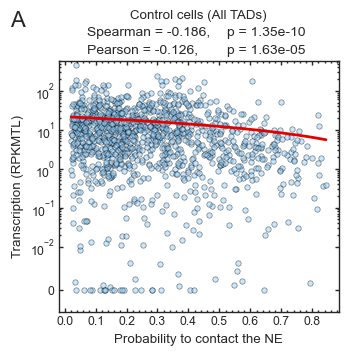

In [13]:
a35=sns.lmplot(x="WT_Probability_NE0.2", y="WT_RPKMTL", data=data, ci=None, palette="coolwarm_r" ,line_kws={'color': 'xkcd:red','lw': 2},scatter_kws = {
   "s": 15, 'color': 'xkcd:light blue','edgecolors': 'black', 'linewidths': .5, 'alpha': 0.5}, aspect=1.0, height=3.503)
ax35 = plt.gca()
ax35.yaxis.set_major_locator(mpl.ticker.MultipleLocator(50.0))
ax35.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(10.0))
ax35.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax35.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.02))
ax35.xaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax35.xaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
ax35.yaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax35.yaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
x35=data['WT_Probability_NE0.2']
y35=data['WT_RPKMTL']
r35, p35 = stats.pearsonr(x35, y35, alternative='two-sided')
rho35, pval35 = stats.spearmanr(x35, y35, alternative='two-sided')

def annotate(data, **kws):
    
    ax35.text(.1, 1.1, 'Spearman = {:.3f},'.format(rho35),
            transform=ax35.transAxes, fontsize=10)
    ax35.text(.6, 1.1, 'p = {:.2e}'.format(pval35),
            transform=ax35.transAxes, fontsize=10)
    ax35.text(.1, 1.03, 'Pearson = {:.3f},'.format(r35),
            transform=ax35.transAxes, fontsize=10)
    ax35.text(.6, 1.03, 'p = {:.2e}'.format(p35),
            transform=ax35.transAxes, fontsize=10)  
        
        
a35.map_dataframe(annotate)
print ('Pearson:', r35)
print ('P value (Pearson):', p35)
print ('Spearman:', rho35)
print ('P value (Spearman):', pval35)
ax35.text(-0.12, 1.2, "A", transform=ax35.transAxes,
      fontsize=fontsizeL, va='top', ha='right')
ax35.set_title("Control cells (All TADs)",pad=30.0)
plt.ylabel("Transcription (RPKMTL)")
plt.xlabel("Probability to contact the NE")
plt.yscale('symlog', subs =np.arange(2, 10, 1), linthresh =0.01, base=10, linscale = 1.0)
plt.ylim(bottom=-0.005)
plt.ylim(top=600)
plt.savefig('WT_RPKMTL_regr_log.png', format='png', dpi=1200)

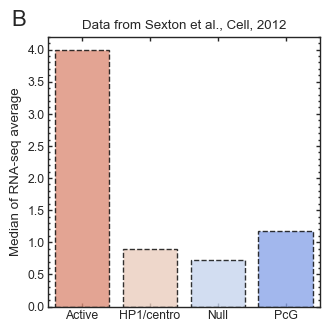

In [14]:
fig = plt.gcf()
fig.set_size_inches(17.8/(2.0*2.54), 17.8/(2.0*2.54))

df = pd.DataFrame({
        'EpiClass': ['Active', 'HP1/centro', 'Null', 'PcG'],
        'Median': [4, 0.9, 0.73, 1.18]})

ax511=sns.barplot(x="EpiClass", y="Median", data=df, palette="coolwarm_r", ci=None,edgecolor="black",lw=1, alpha=0.8,order=["Active","HP1/centro","Null","PcG"], linestyle="dashed" )


plt.ylabel("Median of RNA-seq average")
plt.xlabel("")
plt.title("Data from Sexton et al., Cell, 2012")
ax511.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))
ax511.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
ax511.xaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax511.xaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
ax511.yaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax511.yaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)

ax511.text(-0.08, 1.1, "B", transform=ax511.transAxes,
      fontsize=fontsizeL, va='top', ha='right')
plt.savefig('Sexton_Median.png', format='png', dpi=1200)


Mean
EpiClass
Active        36.167281
HP1/centro    18.163713
Null           7.221695
PcG           12.447847
Name: WT_RPKMT, dtype: float64
Median
EpiClass
Active        21.566320
HP1/centro     8.159863
Null           3.720657
PcG            5.160614
Name: WT_RPKMT, dtype: float64
Error bars
EpiClass
Active        2.120983
HP1/centro    4.707161
Null          0.534356
PcG           2.193593
Name: WT_RPKMT, dtype: float64


,count,mean,std,min,25%,50%,75%,max
EpiClass,,,,,,,,
Active,494.0,36.167281,47.141206,0.0,12.250202,21.566320,40.657379,530.990241
HP1/centro,52.0,18.163713,33.943822,0.0,1.938521,8.159863,16.597972,216.285012
Null,492.0,7.221695,11.852586,0.0,1.380129,3.720657,7.870887,97.481138
PcG,131.0,12.447847,25.106818,0.0,1.412422,5.160614,11.332740,222.004667


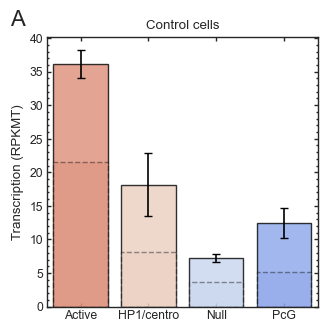

In [15]:

fig = plt.gcf()
fig.set_size_inches(17.8/(2.0*2.54), 17.8/(2.0*2.54))

data11=data.groupby('EpiClass')
yerrbar1=data11['WT_RPKMT'].sem()
print('Mean')
print(data11['WT_RPKMT'].mean())
print('Median')
print(data11['WT_RPKMT'].median())
ax0 = sns.barplot(x="EpiClass", y="WT_RPKMT", data=data, palette="coolwarm_r", estimator=np.mean,yerr=yerrbar1,order=["Active","HP1/centro","Null","PcG"], edgecolor="black",lw=1,ci=None, alpha=0.8)
ax0 = sns.barplot(x="EpiClass", y="WT_RPKMT", data=data, palette="coolwarm_r", estimator=np.median, ci=None,order=["Active","HP1/centro","Null","PcG"],edgecolor="black",lw=1, alpha=0.4,linestyle="dashed")
plt.ylabel("Transcription (RPKMT)")
plt.xlabel("")
ax0.set_title("Control cells")
ax0.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5.0))
ax0.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1.0))
ax0.xaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax0.xaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
ax0.yaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax0.yaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
ax0.text(-0.08, 1.1, "A", transform=ax0.transAxes,
      fontsize=fontsizeL,  va='top', ha='right')
plt.savefig('WT_RPKMT_ALLTADs_Mean_Med.png', format='png', dpi=1200)
print('Error bars')
print(yerrbar1)
data.groupby('EpiClass').WT_RPKMT.describe()

SEM
EpiClass
Active        1.787774
HP1/centro    2.164377
Null          0.339812
PcG           1.276641
Name: WT_RPKMTL, dtype: float64
Mean
EpiClass
Active        31.126930
HP1/centro    10.319353
Null           4.619796
PcG            6.772376
Name: WT_RPKMTL, dtype: float64
Median
EpiClass
Active        18.802399
HP1/centro     5.131974
Null           2.307268
PcG            2.599763
Name: WT_RPKMTL, dtype: float64


,count,mean,std,min,25%,50%,75%,max
EpiClass,,,,,,,,
Active,494.0,31.126930,39.735262,0.0,10.698295,18.802399,35.460429,456.818848
HP1/centro,52.0,10.319353,15.607542,0.0,0.857296,5.131974,11.987330,75.658881
Null,492.0,4.619796,7.537390,0.0,0.767858,2.307268,5.220393,78.447834
PcG,131.0,6.772376,14.611826,0.0,0.713341,2.599763,7.389485,141.531875


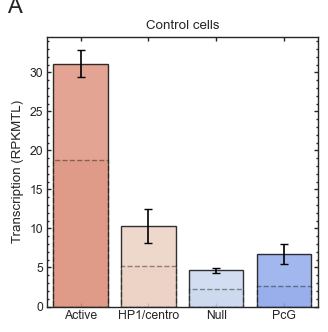

In [16]:
fig = plt.gcf()
fig.set_size_inches(17.8/(2.0*2.54), 17.8/(2.0*2.54))
data112=data.groupby('EpiClass')
yerrbar112=data112['WT_RPKMTL'].sem()
print("SEM")
print(yerrbar112)
print("Mean")
print(data112['WT_RPKMTL'].mean())
print("Median")
print(data112['WT_RPKMTL'].median())
ax01 = sns.barplot(x="EpiClass", y="WT_RPKMTL", data=data, palette="coolwarm_r", estimator=np.mean,yerr=yerrbar112,order=["Active","HP1/centro","Null","PcG"],edgecolor="black",lw=1,ci=None, alpha=0.8)
ax01 = sns.barplot(x="EpiClass", y="WT_RPKMTL", data=data, palette="coolwarm_r", estimator=np.median, ci=None,order=["Active","HP1/centro","Null","PcG"],edgecolor="black",lw=1, alpha=0.4,linestyle="dashed")
plt.ylabel("Transcription (RPKMTL)")
plt.xlabel("")
ax01.set_title("Control cells")
ax01.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5.0))
ax01.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1.0))
ax01.xaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax01.xaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
ax01.yaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax01.yaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
ax01.text(-0.08, 1.1, "A", transform=ax0.transAxes,
      fontsize=fontsizeL, va='top', ha='right')

plt.savefig('WT_RPKMTL_ALLTADs_Mean_Med.png', format='png', dpi=1200)
data.groupby('EpiClass').WT_RPKMTL.describe()

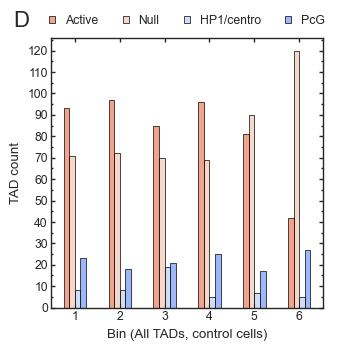

In [17]:
fig = plt.gcf()
fig.set_size_inches(17.8/(2.0*2.54), 17.8/(2.0*2.54))
ax511 = sns.histplot(x="Bin_ALL_TADs", data=data, hue="EpiClass", stat="count",palette="coolwarm_r", discrete=True, multiple="dodge", shrink=0.5,linewidth=0.5,edgecolor="black")


sns.move_legend(
    ax511, "lower center",
    bbox_to_anchor=(.5, 1), title=None, ncol=4,handlelength=0.5,handleheight=0.5, frameon=False)

ax511.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10.0))
ax511.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5.0))
ax511.xaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax511.xaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
ax511.yaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax511.yaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)


plt.xlabel("Bin (All TADs, control cells)")
plt.ylabel("TAD count")
ax511.text(-0.08, 1.1, "D", transform=ax511.transAxes,
      fontsize=fontsizeL, va='top', ha='right')
plt.savefig('WT_RPKMT_bin_AllTAD_strip_count.png', format='png', dpi=1200)

#data.groupby('EpiClass').WT_RPKMT.describe()

bID                                                \
                        count        mean         std    min     25%    50%   
Class     Bin_ALL_TADs                                                        
L-TADs    1               8.0  380.625000  224.068190   77.0  326.75  353.0   
          2              21.0  522.238095  341.260444   61.0  337.00  380.0   
          3              25.0  594.120000  380.333551   56.0  267.00  680.0   
          4              37.0  648.378378  393.009425   16.0  391.00  707.0   
          5              93.0  604.688172  349.664186    3.0  274.00  619.0   
          6             166.0  615.006024  324.931237    0.0  292.50  561.5   
NonL-TADs 1             187.0  499.481283  307.467584   62.0  305.50  365.0   
          2             174.0  612.747126  355.188405   19.0  338.50  671.5   
          3             170.0  623.829412  339.507580   17.0  282.25  603.0   
          4             158.0  571.810127  361.050505    4.0  242.00  543.5   
          5             102.0  600.107843  313.110739    1.0  415.50  601.5   
          6              28.0  666.178571  321.901763  166.0  398.75  705.0   

                                          bRad            ... Bin_LTADs       \
                            75%     max  count      mean  ...       75%  max   
Class     Bin_ALL_TADs                                    ...                  
L-TADs    1              367.00   881.0    8.0  0.092500  ...       1.0  1.0   
          2              724.00  1161.0   21.0  0.085238  ...       1.0  1.0   
          3              867.00  1174.0   25.0  0.098000  ...       1.0  1.0   
          4             1010.00  1169.0   37.0  0.111892  ...       2.0  2.0   
          5              907.00  1156.0   93.0  0.109247  ...       3.0  4.0   
          6              923.25  1151.0  166.0  0.115361  ...       6.0  6.0   
NonL-TADs 1              803.50  1176.0  187.0  0.078930  ...       NaN  NaN   
          2              892.00  1173.0  174.0  0.076782  ...       NaN  NaN   
          3              973.00  1168.0  170.0  0.076647  ...       NaN  NaN   
          4              947.50  1165.0  158.0  0.072468  ...       NaN  NaN   
          5              831.00  1149.0  102.0  0.067941  ...       NaN  NaN   
          6              926.25  1152.0   28.0  0.065714  ...       NaN  NaN   

                       Bin_NonLTADs                                          \
                              count      mean       std  min  25%  50%  75%   
Class     Bin_ALL_TADs                                                        
L-TADs    1                     0.0       NaN       NaN  NaN  NaN  NaN  NaN   
          2                     0.0       NaN       NaN  NaN  NaN  NaN  NaN   
          3                     0.0       NaN       NaN  NaN  NaN  NaN  NaN   
          4                     0.0       NaN       NaN  NaN  NaN  NaN  NaN   
          5                     0.0       NaN       NaN  NaN  NaN  NaN  NaN   
          6                     0.0       NaN       NaN  NaN  NaN  NaN  NaN   
NonL-TADs 1                   187.0  1.267380  0.443780  1.0  1.0  1.0  2.0   
          2                   174.0  2.500000  0.501443  2.0  2.0  2.5  3.0   
          3                   170.0  3.705882  0.456991  3.0  3.0  4.0  4.0   
          4                   158.0  4.917722  0.356294  4.0  5.0  5.0  5.0   
          5                   102.0  6.000000  0.000000  6.0  6.0  6.0  6.0   
          6                    28.0  6.000000  0.000000  6.0  6.0  6.0  6.0   

                             
                        max  
Class     Bin_ALL_TADs       
L-TADs    1             NaN  
          2             NaN  
          3             NaN  
          4             NaN  
          5             NaN  
          6             NaN  
NonL-TADs 1             2.0  
          2             3.0  
          3             4.0  
          4             6.0  
          5             6.0  
          6             6.0  

[1

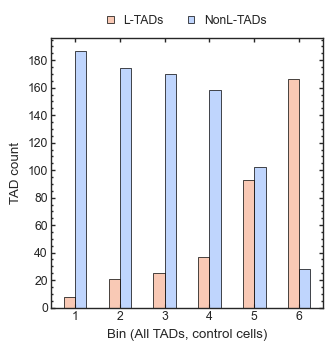

In [18]:
fig = plt.gcf()
fig.set_size_inches(17.8/(2.0*2.54), 17.8/(2.0*2.54))
ax512 = sns.histplot(x="Bin_ALL_TADs", data=data, hue="Class", stat="count",palette="coolwarm_r", discrete=True, multiple="dodge", shrink=0.5,linewidth=0.5,edgecolor="black")

sns.move_legend(
    ax512, "lower center",
    bbox_to_anchor=(.5, 1), title=None, ncol=4,handlelength=0.5,handleheight=0.5, frameon=False)

ax512.yaxis.set_major_locator(mpl.ticker.MultipleLocator(20.0))
ax512.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5.0))
ax512.xaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax512.xaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
ax512.yaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax512.yaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)

plt.xlabel("Bin (All TADs, control cells)")
plt.ylabel("TAD count")
plt.savefig('WT_RPKMT_bin_AllTAD_strip_count_Class.png', format='png', dpi=1200)
data.groupby(['Class','Bin_ALL_TADs']).describe()


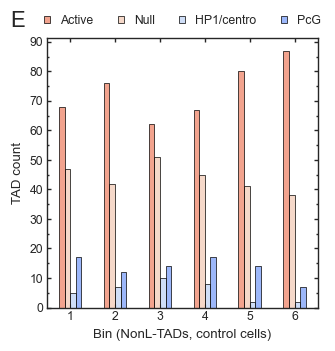

In [19]:
fig = plt.gcf()
fig.set_size_inches(17.8/(2.0*2.54), 17.8/(2.0*2.54))
ax513 = sns.histplot(x="Bin_NonLTADs", data=data, hue="EpiClass", stat="count",palette="coolwarm_r", discrete=True, multiple="dodge", shrink=0.5,linewidth=0.5,edgecolor="black")


sns.move_legend(
    ax513, "lower center",
    bbox_to_anchor=(.5, 1), title=None, ncol=4,handlelength=0.5,handleheight=0.5, frameon=False)

ax513.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10.0))
ax513.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5.0))
ax513.xaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax513.xaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
ax513.yaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax513.yaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)

plt.xlabel("Bin (NonL-TADs, control cells)")
plt.ylabel("TAD count")

ax513.text(-0.08, 1.1, "E", transform=ax513.transAxes,
      fontsize=fontsizeL, va='top', ha='right')
plt.savefig('WT_RPKMT_bin_NonLTAD_strip_count.png', format='png', dpi=1200)

In [20]:
data_alltads_sorted_WTProbability = data.sort_values('WT_Probability_NE0.2')

ALL_TADS_sorted_WT_Probability_WT_Probability = data_alltads_sorted_WTProbability['WT_Probability_NE0.2']

ALL_TADS_sorted_WT_Probability_WT_RPKMT = data_alltads_sorted_WTProbability['WT_RPKMT']
ALL_TADS_sorted_WT_Probability_Mut_RPKMT = data_alltads_sorted_WTProbability['Mut_RPKMT']
ALL_TADS_sorted_WT_Probability_WT_RPKMTL = data_alltads_sorted_WTProbability['WT_RPKMTL']
ALL_TADS_sorted_WT_Probability_Mut_RPKMTL = data_alltads_sorted_WTProbability['Mut_RPKMTL']

ALL_TADS_sorted_WT_Probability_Mut_Probability = data_alltads_sorted_WTProbability['Mutant_Probability_NE0.2']



Bin1_AllTADs_Mut_RPKMT_mean = ALL_TADS_sorted_WT_Probability_Mut_RPKMT[0:195].mean()
Bin2_AllTADs_Mut_RPKMT_mean = ALL_TADS_sorted_WT_Probability_Mut_RPKMT[195:390].mean()
Bin3_AllTADs_Mut_RPKMT_mean = ALL_TADS_sorted_WT_Probability_Mut_RPKMT[390:585].mean()
Bin4_AllTADs_Mut_RPKMT_mean = ALL_TADS_sorted_WT_Probability_Mut_RPKMT[585:780].mean()
Bin5_AllTADs_Mut_RPKMT_mean = ALL_TADS_sorted_WT_Probability_Mut_RPKMT[780:975].mean()
Bin6_AllTADs_Mut_RPKMT_mean = ALL_TADS_sorted_WT_Probability_Mut_RPKMT[975:1169].mean()
Bin1_AllTADs_Mut_RPKMT_sem = ALL_TADS_sorted_WT_Probability_Mut_RPKMT[0:195].sem()
Bin2_AllTADs_Mut_RPKMT_sem = ALL_TADS_sorted_WT_Probability_Mut_RPKMT[195:390].sem()
Bin3_AllTADs_Mut_RPKMT_sem = ALL_TADS_sorted_WT_Probability_Mut_RPKMT[390:585].sem()
Bin4_AllTADs_Mut_RPKMT_sem = ALL_TADS_sorted_WT_Probability_Mut_RPKMT[585:780].sem()
Bin5_AllTADs_Mut_RPKMT_sem = ALL_TADS_sorted_WT_Probability_Mut_RPKMT[780:975].sem()
Bin6_AllTADs_Mut_RPKMT_sem = ALL_TADS_sorted_WT_Probability_Mut_RPKMT[975:1169].sem()


Bin1_AllTADs_Mut_RPKMTL_mean = ALL_TADS_sorted_WT_Probability_Mut_RPKMTL[0:195].mean()
Bin2_AllTADs_Mut_RPKMTL_mean = ALL_TADS_sorted_WT_Probability_Mut_RPKMTL[195:390].mean()
Bin3_AllTADs_Mut_RPKMTL_mean = ALL_TADS_sorted_WT_Probability_Mut_RPKMTL[390:585].mean()
Bin4_AllTADs_Mut_RPKMTL_mean = ALL_TADS_sorted_WT_Probability_Mut_RPKMTL[585:780].mean()
Bin5_AllTADs_Mut_RPKMTL_mean = ALL_TADS_sorted_WT_Probability_Mut_RPKMTL[780:975].mean()
Bin6_AllTADs_Mut_RPKMTL_mean = ALL_TADS_sorted_WT_Probability_Mut_RPKMTL[975:1169].mean()
Bin1_AllTADs_Mut_RPKMTL_sem = ALL_TADS_sorted_WT_Probability_Mut_RPKMTL[0:195].sem()
Bin2_AllTADs_Mut_RPKMTL_sem = ALL_TADS_sorted_WT_Probability_Mut_RPKMTL[195:390].sem()
Bin3_AllTADs_Mut_RPKMTL_sem = ALL_TADS_sorted_WT_Probability_Mut_RPKMTL[390:585].sem()
Bin4_AllTADs_Mut_RPKMTL_sem = ALL_TADS_sorted_WT_Probability_Mut_RPKMTL[585:780].sem()
Bin5_AllTADs_Mut_RPKMTL_sem = ALL_TADS_sorted_WT_Probability_Mut_RPKMTL[780:975].sem()
Bin6_AllTADs_Mut_RPKMTL_sem = ALL_TADS_sorted_WT_Probability_Mut_RPKMTL[975:1169].sem()

Bin1_AllTADs_WT_RPKMT_mean = ALL_TADS_sorted_WT_Probability_WT_RPKMT[0:195].mean()
Bin2_AllTADs_WT_RPKMT_mean = ALL_TADS_sorted_WT_Probability_WT_RPKMT[195:390].mean()
Bin3_AllTADs_WT_RPKMT_mean = ALL_TADS_sorted_WT_Probability_WT_RPKMT[390:585].mean()
Bin4_AllTADs_WT_RPKMT_mean = ALL_TADS_sorted_WT_Probability_WT_RPKMT[585:780].mean()
Bin5_AllTADs_WT_RPKMT_mean = ALL_TADS_sorted_WT_Probability_WT_RPKMT[780:975].mean()
Bin6_AllTADs_WT_RPKMT_mean = ALL_TADS_sorted_WT_Probability_WT_RPKMT[975:1169].mean()
Bin1_AllTADs_WT_RPKMT_sem = ALL_TADS_sorted_WT_Probability_WT_RPKMT[0:195].sem()
Bin2_AllTADs_WT_RPKMT_sem = ALL_TADS_sorted_WT_Probability_WT_RPKMT[195:390].sem()
Bin3_AllTADs_WT_RPKMT_sem = ALL_TADS_sorted_WT_Probability_WT_RPKMT[390:585].sem()
Bin4_AllTADs_WT_RPKMT_sem = ALL_TADS_sorted_WT_Probability_WT_RPKMT[585:780].sem()
Bin5_AllTADs_WT_RPKMT_sem = ALL_TADS_sorted_WT_Probability_WT_RPKMT[780:975].sem()
Bin6_AllTADs_WT_RPKMT_sem = ALL_TADS_sorted_WT_Probability_WT_RPKMT[975:1169].sem()

Bin1_AllTADs_WT_RPKMTL_mean = ALL_TADS_sorted_WT_Probability_WT_RPKMTL[0:195].mean()
Bin2_AllTADs_WT_RPKMTL_mean = ALL_TADS_sorted_WT_Probability_WT_RPKMTL[195:390].mean()
Bin3_AllTADs_WT_RPKMTL_mean = ALL_TADS_sorted_WT_Probability_WT_RPKMTL[390:585].mean()
Bin4_AllTADs_WT_RPKMTL_mean = ALL_TADS_sorted_WT_Probability_WT_RPKMTL[585:780].mean()
Bin5_AllTADs_WT_RPKMTL_mean = ALL_TADS_sorted_WT_Probability_WT_RPKMTL[780:975].mean()
Bin6_AllTADs_WT_RPKMTL_mean = ALL_TADS_sorted_WT_Probability_WT_RPKMTL[975:1169].mean()
Bin1_AllTADs_WT_RPKMTL_sem = ALL_TADS_sorted_WT_Probability_WT_RPKMTL[0:195].sem()
Bin2_AllTADs_WT_RPKMTL_sem = ALL_TADS_sorted_WT_Probability_WT_RPKMTL[195:390].sem()
Bin3_AllTADs_WT_RPKMTL_sem = ALL_TADS_sorted_WT_Probability_WT_RPKMTL[390:585].sem()
Bin4_AllTADs_WT_RPKMTL_sem = ALL_TADS_sorted_WT_Probability_WT_RPKMTL[585:780].sem()
Bin5_AllTADs_WT_RPKMTL_sem = ALL_TADS_sorted_WT_Probability_WT_RPKMTL[780:975].sem()
Bin6_AllTADs_WT_RPKMTL_sem = ALL_TADS_sorted_WT_Probability_WT_RPKMTL[975:1169].sem()


Width_Bin1_ALLTADs_WT_Binning = ALL_TADS_sorted_WT_Probability_WT_Probability[194:195].mean() - ALL_TADS_sorted_WT_Probability_WT_Probability[0:1].mean()
Xmean_Bin1_ALLTADs_WT_Binning = 0.5*(ALL_TADS_sorted_WT_Probability_WT_Probability[194:195].mean() + ALL_TADS_sorted_WT_Probability_WT_Probability[0:1].mean())
Width_Bin2_ALLTADs_WT_Binning = ALL_TADS_sorted_WT_Probability_WT_Probability[389:390].mean() - ALL_TADS_sorted_WT_Probability_WT_Probability[195:196].mean()
Xmean_Bin2_ALLTADs_WT_Binning = 0.5*(ALL_TADS_sorted_WT_Probability_WT_Probability[195:196].mean() + ALL_TADS_sorted_WT_Probability_WT_Probability[389:390].mean())
Width_Bin3_ALLTADs_WT_Binning = ALL_TADS_sorted_WT_Probability_WT_Probability[584:585].mean() - ALL_TADS_sorted_WT_Probability_WT_Probability[390:391].mean()
Xmean_Bin3_ALLTADs_WT_Binning = 0.5*(ALL_TADS_sorted_WT_Probability_WT_Probability[584:585].mean() + ALL_TADS_sorted_WT_Probability_WT_Probability[390:391].mean())
Width_Bin4_ALLTADs_WT_Binning = ALL_TADS_sorted_WT_Probability_WT_Probability[779:780].mean() - ALL_TADS_sorted_WT_Probability_WT_Probability[585:586].mean()
Xmean_Bin4_ALLTADs_WT_Binning = 0.5*(ALL_TADS_sorted_WT_Probability_WT_Probability[585:586].mean() + ALL_TADS_sorted_WT_Probability_WT_Probability[779:780].mean())
Width_Bin5_ALLTADs_WT_Binning = ALL_TADS_sorted_WT_Probability_WT_Probability[974:975].mean() - ALL_TADS_sorted_WT_Probability_WT_Probability[780:781].mean()
Xmean_Bin5_ALLTADs_WT_Binning = 0.5*(ALL_TADS_sorted_WT_Probability_WT_Probability[780:781].mean() + ALL_TADS_sorted_WT_Probability_WT_Probability[974:975].mean())
Width_Bin6_ALLTADs_WT_Binning = ALL_TADS_sorted_WT_Probability_WT_Probability[1168:1169].mean() - ALL_TADS_sorted_WT_Probability_WT_Probability[975:976].mean()
Xmean_Bin6_ALLTADs_WT_Binning = 0.5*(ALL_TADS_sorted_WT_Probability_WT_Probability[1168:1169].mean() + ALL_TADS_sorted_WT_Probability_WT_Probability[975:976].mean())


Width_Bin1_ALLTADs_WT_Binning_Mut_Probability = ALL_TADS_sorted_WT_Probability_Mut_Probability[0:195].max() - ALL_TADS_sorted_WT_Probability_Mut_Probability[0:195].min()
Xmean_Bin1_ALLTADs_WT_Binning_Mut_Probability = 0.5*(ALL_TADS_sorted_WT_Probability_Mut_Probability[0:195].max()+ ALL_TADS_sorted_WT_Probability_Mut_Probability[0:195].min())

Width_Bin2_ALLTADs_WT_Binning_Mut_Probability = ALL_TADS_sorted_WT_Probability_Mut_Probability[195:390].max() - ALL_TADS_sorted_WT_Probability_Mut_Probability[195:390].min()
Xmean_Bin2_ALLTADs_WT_Binning_Mut_Probability = 0.5*(ALL_TADS_sorted_WT_Probability_Mut_Probability[195:390].max()+ ALL_TADS_sorted_WT_Probability_Mut_Probability[195:390].min())

Width_Bin3_ALLTADs_WT_Binning_Mut_Probability = ALL_TADS_sorted_WT_Probability_Mut_Probability[390:585].max() - ALL_TADS_sorted_WT_Probability_Mut_Probability[390:585].min()
Xmean_Bin3_ALLTADs_WT_Binning_Mut_Probability = 0.5*(ALL_TADS_sorted_WT_Probability_Mut_Probability[390:585].max()+ ALL_TADS_sorted_WT_Probability_Mut_Probability[390:585].min())

Width_Bin4_ALLTADs_WT_Binning_Mut_Probability = ALL_TADS_sorted_WT_Probability_Mut_Probability[585:780].max() - ALL_TADS_sorted_WT_Probability_Mut_Probability[585:780].min()
Xmean_Bin4_ALLTADs_WT_Binning_Mut_Probability = 0.5*(ALL_TADS_sorted_WT_Probability_Mut_Probability[585:780].max()+ ALL_TADS_sorted_WT_Probability_Mut_Probability[585:780].min())

Width_Bin5_ALLTADs_WT_Binning_Mut_Probability = ALL_TADS_sorted_WT_Probability_Mut_Probability[780:975].max() - ALL_TADS_sorted_WT_Probability_Mut_Probability[780:975].min()
Xmean_Bin5_ALLTADs_WT_Binning_Mut_Probability = 0.5*(ALL_TADS_sorted_WT_Probability_Mut_Probability[780:975].max()+ ALL_TADS_sorted_WT_Probability_Mut_Probability[780:975].min())

Width_Bin6_ALLTADs_WT_Binning_Mut_Probability = ALL_TADS_sorted_WT_Probability_Mut_Probability[975:1169].max() - ALL_TADS_sorted_WT_Probability_Mut_Probability[975:1169].min()
Xmean_Bin6_ALLTADs_WT_Binning_Mut_Probability = 0.5*(ALL_TADS_sorted_WT_Probability_Mut_Probability[975:1169].max()+ ALL_TADS_sorted_WT_Probability_Mut_Probability[975:1169].min())


Group_Class = data.groupby('Class')
L_TADs_group = Group_Class.get_group('L-TADs')
L_TADS_sorted_WT_Probability = L_TADs_group.sort_values('WT_Probability_NE0.2')

L_TADS_sorted_WT_Probability_WT_Probability = L_TADS_sorted_WT_Probability['WT_Probability_NE0.2']

L_TADS_sorted_WT_Probability_Mut_Probability = L_TADS_sorted_WT_Probability['Mutant_Probability_NE0.2']


L_TADS_sorted_WT_Probability_WT_RPKMT = L_TADS_sorted_WT_Probability['WT_RPKMT']
L_TADS_sorted_WT_Probability_Mut_RPKMT = L_TADS_sorted_WT_Probability['Mut_RPKMT']
L_TADS_sorted_WT_Probability_WT_RPKMTL = L_TADS_sorted_WT_Probability['WT_RPKMTL']
L_TADS_sorted_WT_Probability_Mut_RPKMTL = L_TADS_sorted_WT_Probability['Mut_RPKMTL']

Bin1_LTADs_WT_RPKMT_mean = L_TADS_sorted_WT_Probability_WT_RPKMT[0:58].mean()
Bin2_LTADs_WT_RPKMT_mean = L_TADS_sorted_WT_Probability_WT_RPKMT[58:116].mean()
Bin3_LTADs_WT_RPKMT_mean = L_TADS_sorted_WT_Probability_WT_RPKMT[116:174].mean()
Bin4_LTADs_WT_RPKMT_mean = L_TADS_sorted_WT_Probability_WT_RPKMT[174:232].mean()
Bin5_LTADs_WT_RPKMT_mean = L_TADS_sorted_WT_Probability_WT_RPKMT[232:290].mean()
Bin6_LTADs_WT_RPKMT_mean = L_TADS_sorted_WT_Probability_WT_RPKMT[290:350].mean()
Bin1_LTADs_WT_RPKMT_sem = L_TADS_sorted_WT_Probability_WT_RPKMT[0:58].sem()
Bin2_LTADs_WT_RPKMT_sem = L_TADS_sorted_WT_Probability_WT_RPKMT[58:116].sem()
Bin3_LTADs_WT_RPKMT_sem = L_TADS_sorted_WT_Probability_WT_RPKMT[116:174].sem()
Bin4_LTADs_WT_RPKMT_sem = L_TADS_sorted_WT_Probability_WT_RPKMT[174:232].sem()
Bin5_LTADs_WT_RPKMT_sem = L_TADS_sorted_WT_Probability_WT_RPKMT[232:290].sem()
Bin6_LTADs_WT_RPKMT_sem = L_TADS_sorted_WT_Probability_WT_RPKMT[290:350].sem()


Bin1_LTADs_WT_RPKMTL_mean = L_TADS_sorted_WT_Probability_WT_RPKMTL[0:58].mean()
Bin2_LTADs_WT_RPKMTL_mean = L_TADS_sorted_WT_Probability_WT_RPKMTL[58:116].mean()
Bin3_LTADs_WT_RPKMTL_mean = L_TADS_sorted_WT_Probability_WT_RPKMTL[116:174].mean()
Bin4_LTADs_WT_RPKMTL_mean = L_TADS_sorted_WT_Probability_WT_RPKMTL[174:232].mean()
Bin5_LTADs_WT_RPKMTL_mean = L_TADS_sorted_WT_Probability_WT_RPKMTL[232:290].mean()
Bin6_LTADs_WT_RPKMTL_mean = L_TADS_sorted_WT_Probability_WT_RPKMTL[290:350].mean()
Bin1_LTADs_WT_RPKMTL_sem = L_TADS_sorted_WT_Probability_WT_RPKMTL[0:58].sem()
Bin2_LTADs_WT_RPKMTL_sem = L_TADS_sorted_WT_Probability_WT_RPKMTL[58:116].sem()
Bin3_LTADs_WT_RPKMTL_sem = L_TADS_sorted_WT_Probability_WT_RPKMTL[116:174].sem()
Bin4_LTADs_WT_RPKMTL_sem = L_TADS_sorted_WT_Probability_WT_RPKMTL[174:232].sem()
Bin5_LTADs_WT_RPKMTL_sem = L_TADS_sorted_WT_Probability_WT_RPKMTL[232:290].sem()
Bin6_LTADs_WT_RPKMTL_sem = L_TADS_sorted_WT_Probability_WT_RPKMTL[290:350].sem()


Bin1_LTADs_Mut_RPKMT_mean = L_TADS_sorted_WT_Probability_Mut_RPKMT[0:58].mean()
Bin2_LTADs_Mut_RPKMT_mean = L_TADS_sorted_WT_Probability_Mut_RPKMT[58:116].mean()
Bin3_LTADs_Mut_RPKMT_mean = L_TADS_sorted_WT_Probability_Mut_RPKMT[116:174].mean()
Bin4_LTADs_Mut_RPKMT_mean = L_TADS_sorted_WT_Probability_Mut_RPKMT[174:232].mean()
Bin5_LTADs_Mut_RPKMT_mean = L_TADS_sorted_WT_Probability_Mut_RPKMT[232:290].mean()
Bin6_LTADs_Mut_RPKMT_mean = L_TADS_sorted_WT_Probability_Mut_RPKMT[290:350].mean()
Bin1_LTADs_Mut_RPKMT_sem = L_TADS_sorted_WT_Probability_Mut_RPKMT[0:58].sem()
Bin2_LTADs_Mut_RPKMT_sem = L_TADS_sorted_WT_Probability_Mut_RPKMT[58:116].sem()
Bin3_LTADs_Mut_RPKMT_sem = L_TADS_sorted_WT_Probability_Mut_RPKMT[116:174].sem()
Bin4_LTADs_Mut_RPKMT_sem = L_TADS_sorted_WT_Probability_Mut_RPKMT[174:232].sem()
Bin5_LTADs_Mut_RPKMT_sem = L_TADS_sorted_WT_Probability_Mut_RPKMT[232:290].sem()
Bin6_LTADs_Mut_RPKMT_sem = L_TADS_sorted_WT_Probability_Mut_RPKMT[290:350].sem()


Bin1_LTADs_Mut_RPKMTL_mean = L_TADS_sorted_WT_Probability_Mut_RPKMTL[0:58].mean()
Bin2_LTADs_Mut_RPKMTL_mean = L_TADS_sorted_WT_Probability_Mut_RPKMTL[58:116].mean()
Bin3_LTADs_Mut_RPKMTL_mean = L_TADS_sorted_WT_Probability_Mut_RPKMTL[116:174].mean()
Bin4_LTADs_Mut_RPKMTL_mean = L_TADS_sorted_WT_Probability_Mut_RPKMTL[174:232].mean()
Bin5_LTADs_Mut_RPKMTL_mean = L_TADS_sorted_WT_Probability_Mut_RPKMTL[232:290].mean()
Bin6_LTADs_Mut_RPKMTL_mean = L_TADS_sorted_WT_Probability_Mut_RPKMTL[290:350].mean()
Bin1_LTADs_Mut_RPKMTL_sem = L_TADS_sorted_WT_Probability_Mut_RPKMTL[0:58].sem()
Bin2_LTADs_Mut_RPKMTL_sem = L_TADS_sorted_WT_Probability_Mut_RPKMTL[58:116].sem()
Bin3_LTADs_Mut_RPKMTL_sem = L_TADS_sorted_WT_Probability_Mut_RPKMTL[116:174].sem()
Bin4_LTADs_Mut_RPKMTL_sem = L_TADS_sorted_WT_Probability_Mut_RPKMTL[174:232].sem()
Bin5_LTADs_Mut_RPKMTL_sem = L_TADS_sorted_WT_Probability_Mut_RPKMTL[232:290].sem()
Bin6_LTADs_Mut_RPKMTL_sem = L_TADS_sorted_WT_Probability_Mut_RPKMTL[290:350].sem()


Width_Bin1_LTADs_WT_Binning = L_TADS_sorted_WT_Probability_WT_Probability[57:58].mean() - L_TADS_sorted_WT_Probability_WT_Probability[0:1].mean()
Xmean_Bin1_LTADs_WT_Binning = 0.5*(L_TADS_sorted_WT_Probability_WT_Probability[57:58].mean() + L_TADS_sorted_WT_Probability_WT_Probability[0:1].mean())

Width_Bin2_LTADs_WT_Binning = L_TADS_sorted_WT_Probability_WT_Probability[115:116].mean() - L_TADS_sorted_WT_Probability_WT_Probability[58:59].mean()
Xmean_Bin2_LTADs_WT_Binning = 0.5*(L_TADS_sorted_WT_Probability_WT_Probability[115:116].mean() + L_TADS_sorted_WT_Probability_WT_Probability[58:59].mean())

Width_Bin3_LTADs_WT_Binning = L_TADS_sorted_WT_Probability_WT_Probability[173:174].mean() - L_TADS_sorted_WT_Probability_WT_Probability[116:117].mean()
Xmean_Bin3_LTADs_WT_Binning = 0.5*(L_TADS_sorted_WT_Probability_WT_Probability[173:174].mean() + L_TADS_sorted_WT_Probability_WT_Probability[116:117].mean())

Width_Bin4_LTADs_WT_Binning = L_TADS_sorted_WT_Probability_WT_Probability[231:232].mean() - L_TADS_sorted_WT_Probability_WT_Probability[174:175].mean()
Xmean_Bin4_LTADs_WT_Binning = 0.5*(L_TADS_sorted_WT_Probability_WT_Probability[231:232].mean() + L_TADS_sorted_WT_Probability_WT_Probability[174:175].mean())


Width_Bin5_LTADs_WT_Binning = L_TADS_sorted_WT_Probability_WT_Probability[289:290].mean() - L_TADS_sorted_WT_Probability_WT_Probability[232:233].mean()
Xmean_Bin5_LTADs_WT_Binning = 0.5*(L_TADS_sorted_WT_Probability_WT_Probability[289:290].mean() + L_TADS_sorted_WT_Probability_WT_Probability[232:233].mean())

Width_Bin6_LTADs_WT_Binning = L_TADS_sorted_WT_Probability_WT_Probability[349:350].mean() - L_TADS_sorted_WT_Probability_WT_Probability[290:291].mean()
Xmean_Bin6_LTADs_WT_Binning = 0.5*(L_TADS_sorted_WT_Probability_WT_Probability[349:350].mean() + L_TADS_sorted_WT_Probability_WT_Probability[290:291].mean())


Width_Bin1_LTADs_WT_Binning_Mut_Probability = L_TADS_sorted_WT_Probability_Mut_Probability[0:58].max() - L_TADS_sorted_WT_Probability_Mut_Probability[0:58].min()
Xmean_Bin1_LTADs_WT_Binning_Mut_Probability = 0.5*(L_TADS_sorted_WT_Probability_Mut_Probability[0:58].max()+ L_TADS_sorted_WT_Probability_Mut_Probability[0:58].min())

Width_Bin2_LTADs_WT_Binning_Mut_Probability = L_TADS_sorted_WT_Probability_Mut_Probability[58:116].max() - L_TADS_sorted_WT_Probability_Mut_Probability[58:116].min()
Xmean_Bin2_LTADs_WT_Binning_Mut_Probability = 0.5*(L_TADS_sorted_WT_Probability_Mut_Probability[58:116].max()+ L_TADS_sorted_WT_Probability_Mut_Probability[58:116].min())

Width_Bin3_LTADs_WT_Binning_Mut_Probability = L_TADS_sorted_WT_Probability_Mut_Probability[116:174].max() - L_TADS_sorted_WT_Probability_Mut_Probability[116:174].min()
Xmean_Bin3_LTADs_WT_Binning_Mut_Probability = 0.5*(L_TADS_sorted_WT_Probability_Mut_Probability[116:174].max()+ L_TADS_sorted_WT_Probability_Mut_Probability[116:174].min())

Width_Bin4_LTADs_WT_Binning_Mut_Probability = L_TADS_sorted_WT_Probability_Mut_Probability[174:232].max() - L_TADS_sorted_WT_Probability_Mut_Probability[174:232].min()
Xmean_Bin4_LTADs_WT_Binning_Mut_Probability = 0.5*(L_TADS_sorted_WT_Probability_Mut_Probability[174:232].max()+ L_TADS_sorted_WT_Probability_Mut_Probability[174:232].min())

Width_Bin5_LTADs_WT_Binning_Mut_Probability  = L_TADS_sorted_WT_Probability_Mut_Probability[232:290].max() - L_TADS_sorted_WT_Probability_Mut_Probability[232:290].min()
Xmean_Bin5_LTADs_WT_Binning_Mut_Probability = 0.5*(L_TADS_sorted_WT_Probability_Mut_Probability[232:290].max()+ L_TADS_sorted_WT_Probability_Mut_Probability[232:290].min())

Width_Bin6_LTADs_WT_Binning_Mut_Probability = L_TADS_sorted_WT_Probability_Mut_Probability[290:350].max() - L_TADS_sorted_WT_Probability_Mut_Probability[290:350].min()
Xmean_Bin6_LTADs_WT_Binning_Mut_Probability = 0.5*(L_TADS_sorted_WT_Probability_Mut_Probability[290:350].max()+ L_TADS_sorted_WT_Probability_Mut_Probability[290:350].min())










NonL_TADs_group = Group_Class.get_group('NonL-TADs')

NonL_TADs_sorted_WT_Probability = NonL_TADs_group.sort_values('WT_Probability_NE0.2')

NonL_TADs_sorted_WT_Probability_WT_Probability = NonL_TADs_sorted_WT_Probability['WT_Probability_NE0.2']

NonL_TADs_sorted_WT_Probability_Mut_Probability = NonL_TADs_sorted_WT_Probability['Mutant_Probability_NE0.2']

NonL_TADs_sorted_WT_Probability_WT_RPKMT = NonL_TADs_sorted_WT_Probability['WT_RPKMT']
NonL_TADs_sorted_WT_Probability_Mut_RPKMT = NonL_TADs_sorted_WT_Probability['Mut_RPKMT']
NonL_TADs_sorted_WT_Probability_WT_RPKMTL = NonL_TADs_sorted_WT_Probability['WT_RPKMTL']
NonL_TADs_sorted_WT_Probability_Mut_RPKMTL = NonL_TADs_sorted_WT_Probability['Mut_RPKMTL']

Bin1_NonL_TADs_WT_RPKMT_mean = NonL_TADs_sorted_WT_Probability_WT_RPKMT[0:137].mean()
Bin2_NonL_TADs_WT_RPKMT_mean = NonL_TADs_sorted_WT_Probability_WT_RPKMT[137:274].mean()
Bin3_NonL_TADs_WT_RPKMT_mean = NonL_TADs_sorted_WT_Probability_WT_RPKMT[274:411].mean()
Bin4_NonL_TADs_WT_RPKMT_mean = NonL_TADs_sorted_WT_Probability_WT_RPKMT[411:548].mean()
Bin5_NonL_TADs_WT_RPKMT_mean = NonL_TADs_sorted_WT_Probability_WT_RPKMT[548:685].mean()
Bin6_NonL_TADs_WT_RPKMT_mean = NonL_TADs_sorted_WT_Probability_WT_RPKMT[685:819].mean()
Bin1_NonL_TADs_WT_RPKMT_sem = NonL_TADs_sorted_WT_Probability_WT_RPKMT[0:137].sem()
Bin2_NonL_TADs_WT_RPKMT_sem = NonL_TADs_sorted_WT_Probability_WT_RPKMT[137:274].sem()
Bin3_NonL_TADs_WT_RPKMT_sem = NonL_TADs_sorted_WT_Probability_WT_RPKMT[274:411].sem()
Bin4_NonL_TADs_WT_RPKMT_sem = NonL_TADs_sorted_WT_Probability_WT_RPKMT[411:548].sem()
Bin5_NonL_TADs_WT_RPKMT_sem = NonL_TADs_sorted_WT_Probability_WT_RPKMT[548:685].sem()
Bin6_NonL_TADs_WT_RPKMT_sem = NonL_TADs_sorted_WT_Probability_WT_RPKMT[685:819].sem()
                                                                       
Bin1_NonL_TADs_WT_RPKMTL_mean = NonL_TADs_sorted_WT_Probability_WT_RPKMTL[0:137].mean()
Bin2_NonL_TADs_WT_RPKMTL_mean = NonL_TADs_sorted_WT_Probability_WT_RPKMTL[137:274].mean()
Bin3_NonL_TADs_WT_RPKMTL_mean = NonL_TADs_sorted_WT_Probability_WT_RPKMTL[274:411].mean()
Bin4_NonL_TADs_WT_RPKMTL_mean = NonL_TADs_sorted_WT_Probability_WT_RPKMTL[411:548].mean()
Bin5_NonL_TADs_WT_RPKMTL_mean = NonL_TADs_sorted_WT_Probability_WT_RPKMTL[548:685].mean()
Bin6_NonL_TADs_WT_RPKMTL_mean = NonL_TADs_sorted_WT_Probability_WT_RPKMTL[685:819].mean()
Bin1_NonL_TADs_WT_RPKMTL_sem = NonL_TADs_sorted_WT_Probability_WT_RPKMTL[0:137].sem()
Bin2_NonL_TADs_WT_RPKMTL_sem = NonL_TADs_sorted_WT_Probability_WT_RPKMTL[137:274].sem()
Bin3_NonL_TADs_WT_RPKMTL_sem = NonL_TADs_sorted_WT_Probability_WT_RPKMTL[274:411].sem()
Bin4_NonL_TADs_WT_RPKMTL_sem = NonL_TADs_sorted_WT_Probability_WT_RPKMTL[411:548].sem()
Bin5_NonL_TADs_WT_RPKMTL_sem = NonL_TADs_sorted_WT_Probability_WT_RPKMTL[548:685].sem()
Bin6_NonL_TADs_WT_RPKMTL_sem = NonL_TADs_sorted_WT_Probability_WT_RPKMTL[685:819].sem()
                                                                         
Bin1_NonL_TADs_Mut_RPKMTL_mean = NonL_TADs_sorted_WT_Probability_Mut_RPKMTL[0:137].mean()
Bin2_NonL_TADs_Mut_RPKMTL_mean = NonL_TADs_sorted_WT_Probability_Mut_RPKMTL[137:274].mean()
Bin3_NonL_TADs_Mut_RPKMTL_mean = NonL_TADs_sorted_WT_Probability_Mut_RPKMTL[274:411].mean()
Bin4_NonL_TADs_Mut_RPKMTL_mean = NonL_TADs_sorted_WT_Probability_Mut_RPKMTL[411:548].mean()
Bin5_NonL_TADs_Mut_RPKMTL_mean = NonL_TADs_sorted_WT_Probability_Mut_RPKMTL[548:685].mean()
Bin6_NonL_TADs_Mut_RPKMTL_mean = NonL_TADs_sorted_WT_Probability_Mut_RPKMTL[685:819].mean()
Bin1_NonL_TADs_Mut_RPKMTL_sem = NonL_TADs_sorted_WT_Probability_Mut_RPKMTL[0:137].sem()
Bin2_NonL_TADs_Mut_RPKMTL_sem = NonL_TADs_sorted_WT_Probability_Mut_RPKMTL[137:274].sem()
Bin3_NonL_TADs_Mut_RPKMTL_sem = NonL_TADs_sorted_WT_Probability_Mut_RPKMTL[274:411].sem()
Bin4_NonL_TADs_Mut_RPKMTL_sem = NonL_TADs_sorted_WT_Probability_Mut_RPKMTL[411:548].sem()
Bin5_NonL_TADs_Mut_RPKMTL_sem = NonL_TADs_sorted_WT_Probability_Mut_RPKMTL[548:685].sem()
Bin6_NonL_TADs_Mut_RPKMTL_sem = NonL_TADs_sorted_WT_Probability_Mut_RPKMTL[685:819].sem()

Bin1_NonL_TADs_Mut_RPKMT_mean = NonL_TADs_sorted_WT_Probability_Mut_RPKMT[0:137].mean()
Bin2_NonL_TADs_Mut_RPKMT_mean = NonL_TADs_sorted_WT_Probability_Mut_RPKMT[137:274].mean()
Bin3_NonL_TADs_Mut_RPKMT_mean = NonL_TADs_sorted_WT_Probability_Mut_RPKMT[274:411].mean()
Bin4_NonL_TADs_Mut_RPKMT_mean = NonL_TADs_sorted_WT_Probability_Mut_RPKMT[411:548].mean()
Bin5_NonL_TADs_Mut_RPKMT_mean = NonL_TADs_sorted_WT_Probability_Mut_RPKMT[548:685].mean()
Bin6_NonL_TADs_Mut_RPKMT_mean = NonL_TADs_sorted_WT_Probability_Mut_RPKMT[685:819].mean()
Bin1_NonL_TADs_Mut_RPKMT_sem = NonL_TADs_sorted_WT_Probability_Mut_RPKMT[0:137].sem()
Bin2_NonL_TADs_Mut_RPKMT_sem = NonL_TADs_sorted_WT_Probability_Mut_RPKMT[137:274].sem()
Bin3_NonL_TADs_Mut_RPKMT_sem = NonL_TADs_sorted_WT_Probability_Mut_RPKMT[274:411].sem()
Bin4_NonL_TADs_Mut_RPKMT_sem = NonL_TADs_sorted_WT_Probability_Mut_RPKMT[411:548].sem()
Bin5_NonL_TADs_Mut_RPKMT_sem = NonL_TADs_sorted_WT_Probability_Mut_RPKMT[548:685].sem()
Bin6_NonL_TADs_Mut_RPKMT_sem = NonL_TADs_sorted_WT_Probability_Mut_RPKMT[685:819].sem()


Width_Bin1_NonL_TADs_WT_Binning = NonL_TADs_sorted_WT_Probability_WT_Probability[136:137].mean() - NonL_TADs_sorted_WT_Probability_WT_Probability[0:1].mean()
Xmean_Bin1_NonL_TADs_WT_Binning = 0.5*(NonL_TADs_sorted_WT_Probability_WT_Probability[136:137].mean() + NonL_TADs_sorted_WT_Probability_WT_Probability[0:1].mean())

Width_Bin2_NonL_TADs_WT_Binning = NonL_TADs_sorted_WT_Probability_WT_Probability[273:274].mean() - NonL_TADs_sorted_WT_Probability_WT_Probability[137:138].mean()
Xmean_Bin2_NonL_TADs_WT_Binning = 0.5*(NonL_TADs_sorted_WT_Probability_WT_Probability[273:274].mean() + NonL_TADs_sorted_WT_Probability_WT_Probability[137:138].mean())

Width_Bin3_NonL_TADs_WT_Binning = NonL_TADs_sorted_WT_Probability_WT_Probability[410:411].mean() - NonL_TADs_sorted_WT_Probability_WT_Probability[274:275].mean()
Xmean_Bin3_NonL_TADs_WT_Binning = 0.5*(NonL_TADs_sorted_WT_Probability_WT_Probability[410:411].mean() + NonL_TADs_sorted_WT_Probability_WT_Probability[274:275].mean())
 
Width_Bin4_NonL_TADs_WT_Binning = NonL_TADs_sorted_WT_Probability_WT_Probability[547:548].mean() - NonL_TADs_sorted_WT_Probability_WT_Probability[411:412].mean()
Xmean_Bin4_NonL_TADs_WT_Binning = 0.5*(NonL_TADs_sorted_WT_Probability_WT_Probability[547:548].mean() + NonL_TADs_sorted_WT_Probability_WT_Probability[411:412].mean())


Width_Bin5_NonL_TADs_WT_Binning = NonL_TADs_sorted_WT_Probability_WT_Probability[684:685].mean() - NonL_TADs_sorted_WT_Probability_WT_Probability[548:549].mean()
Xmean_Bin5_NonL_TADs_WT_Binning = 0.5*(NonL_TADs_sorted_WT_Probability_WT_Probability[684:685].mean() + NonL_TADs_sorted_WT_Probability_WT_Probability[548:549].mean()) 

Width_Bin6_NonL_TADs_WT_Binning = NonL_TADs_sorted_WT_Probability_WT_Probability[818:819].mean() - NonL_TADs_sorted_WT_Probability_WT_Probability[685:686].mean()
Xmean_Bin6_NonL_TADs_WT_Binning = 0.5*(NonL_TADs_sorted_WT_Probability_WT_Probability[818:819].mean() + NonL_TADs_sorted_WT_Probability_WT_Probability[685:686].mean())


Width_Bin1_NonL_TADs_WT_Binning_Mut_Probability = NonL_TADs_sorted_WT_Probability_Mut_Probability[0:137].max() - NonL_TADs_sorted_WT_Probability_Mut_Probability[0:137].min()
Xmean_Bin1_NonL_TADs_WT_Binning_Mut_Probability = 0.5*(NonL_TADs_sorted_WT_Probability_Mut_Probability[0:137].max()+ NonL_TADs_sorted_WT_Probability_Mut_Probability[0:137].min())

Width_Bin2_NonL_TADs_WT_Binning_Mut_Probability = NonL_TADs_sorted_WT_Probability_Mut_Probability[137:274].max() - NonL_TADs_sorted_WT_Probability_Mut_Probability[137:274].min()
Xmean_Bin2_NonL_TADs_WT_Binning_Mut_Probability = 0.5*(NonL_TADs_sorted_WT_Probability_Mut_Probability[137:274].max()+ NonL_TADs_sorted_WT_Probability_Mut_Probability[137:274].min())


Width_Bin3_NonL_TADs_WT_Binning_Mut_Probability = NonL_TADs_sorted_WT_Probability_Mut_Probability[274:411].max() - NonL_TADs_sorted_WT_Probability_Mut_Probability[274:411].min()
Xmean_Bin3_NonL_TADs_WT_Binning_Mut_Probability = 0.5*(NonL_TADs_sorted_WT_Probability_Mut_Probability[274:411].max()+ NonL_TADs_sorted_WT_Probability_Mut_Probability[274:411].min())

Width_Bin4_NonL_TADs_WT_Binning_Mut_Probability = NonL_TADs_sorted_WT_Probability_Mut_Probability[411:548].max() - NonL_TADs_sorted_WT_Probability_Mut_Probability[411:548].min()
Xmean_Bin4_NonL_TADs_WT_Binning_Mut_Probability = 0.5*(NonL_TADs_sorted_WT_Probability_Mut_Probability[411:548].max()+ NonL_TADs_sorted_WT_Probability_Mut_Probability[411:548].min())


Width_Bin5_NonL_TADs_WT_Binning_Mut_Probability = NonL_TADs_sorted_WT_Probability_Mut_Probability[548:685].max() - NonL_TADs_sorted_WT_Probability_Mut_Probability[548:685].min()
Xmean_Bin5_NonL_TADs_WT_Binning_Mut_Probability = 0.5*(NonL_TADs_sorted_WT_Probability_Mut_Probability[548:685].max()+ NonL_TADs_sorted_WT_Probability_Mut_Probability[548:685].min())

Width_Bin6_NonL_TADs_WT_Binning_Mut_Probability = NonL_TADs_sorted_WT_Probability_Mut_Probability[685:819].max() - NonL_TADs_sorted_WT_Probability_Mut_Probability[685:819].min()
Xmean_Bin6_NonL_TADs_WT_Binning_Mut_Probability = 0.5*(NonL_TADs_sorted_WT_Probability_Mut_Probability[685:819].max()+ NonL_TADs_sorted_WT_Probability_Mut_Probability[685:819].min())


Pearson: -0.07281215451989856
P value (Pearson): 0.17410783551058018
Spearman: -0.03210584723550522
P value (Spearman): 0.5494055996814591


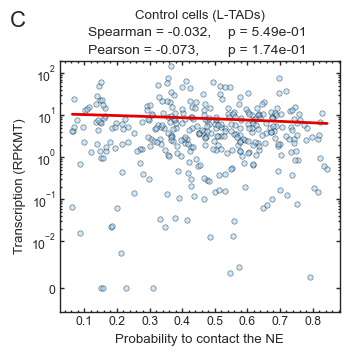

In [21]:
Group_Class = data.groupby('Class')
L_TADs_group = Group_Class.get_group('L-TADs')

a40=sns.lmplot(x="WT_Probability_NE0.2", y="WT_RPKMT", data=L_TADs_group, ci=None, palette="coolwarm_r" ,line_kws={'color': 'xkcd:red','lw': 2},scatter_kws = {
   "s": 15, 'color': 'xkcd:light blue','edgecolors': 'black', 'linewidths': .5, 'alpha': 0.5}, aspect=1.0, height=3.503)
ax40 = plt.gca()
ax40.yaxis.set_major_locator(mpl.ticker.MultipleLocator(20.0))
ax40.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5.0))
ax40.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax40.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.02))
ax40.xaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax40.xaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
ax40.yaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax40.yaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
x40=L_TADs_group['WT_Probability_NE0.2']
y40=L_TADs_group['WT_RPKMT']
r40, p40 = stats.pearsonr(x40, y40, alternative='two-sided')
rho40, pval40 = stats.spearmanr(x40, y40, alternative='two-sided')

def annotate(data, **kws):
    
    #ax40.text(.2, .9, 'Spearman correlation = {:.3f}'.format(rho40),
    #        transform=ax40.transAxes, fontsize=10)
    #ax40.text(.2, .83, 'Pearson correlation = {:.3f}'.format(r40),
    #        transform=ax40.transAxes, fontsize=10)
    ax40.text(.1, 1.1, 'Spearman = {:.3f},'.format(rho40),
            transform=ax40.transAxes, fontsize=10)
    ax40.text(.6, 1.1, 'p = {:.2e}'.format(pval40),
            transform=ax40.transAxes, fontsize=10)
    ax40.text(.1, 1.03, 'Pearson = {:.3f},'.format(r40),
            transform=ax40.transAxes, fontsize=10)
    ax40.text(.6, 1.03, 'p = {:.2e}'.format(p40),
            transform=ax40.transAxes, fontsize=10)
    
    
    
a40.map_dataframe(annotate)
print ('Pearson:', r40)
print ('P value (Pearson):', p40)
print ('Spearman:', rho40)
print ('P value (Spearman):', pval40)

#plt.tick_params(axis='both', which='major', labelsize=fontsiz)
ax40.text(-0.12, 1.2, "C", transform=ax40.transAxes,
      fontsize=fontsizeL,  va='top', ha='right')
ax40.set_title("Control cells (L-TADs)", pad=30.0)
plt.ylabel("Transcription (RPKMT)")
plt.xlabel("Probability to contact the NE")
plt.yscale('symlog', subs =np.arange(2, 10, 1), linthresh =0.01, base=10, linscale = 1.0)
plt.ylim(bottom=-0.005)
plt.ylim(top=200)
#plt.tick_params(axis='both', which='major', labelsize=fontsiz)
plt.savefig('WT_RPKMT_regr_LAD_log.png', format='png', dpi=1200)

Pearson: 0.04060540940181094
P value (Pearson): 0.24574087027072164
Spearman: 0.07556762829699319
P value (Spearman): 0.030587570646865653


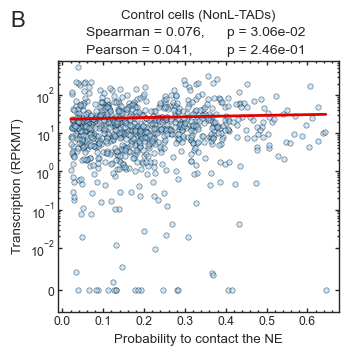

In [22]:
NonL_TADs_group = Group_Class.get_group('NonL-TADs')

a41=sns.lmplot(x="WT_Probability_NE0.2", y="WT_RPKMT", data=NonL_TADs_group, ci=None, palette="coolwarm_r" ,line_kws={'color': 'xkcd:red','lw': 2},scatter_kws = {
   "s": 15, 'color': 'xkcd:light blue','edgecolors': 'black', 'linewidths': .5, 'alpha': 0.5}, aspect=1.0, height=3.503)
ax41 = plt.gca()
ax41.yaxis.set_major_locator(mpl.ticker.MultipleLocator(50.0))
ax41.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(10.0))
ax41.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax41.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.02))
ax41.xaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax41.xaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
ax41.yaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
ax41.yaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
x41=NonL_TADs_group['WT_Probability_NE0.2']
y41=NonL_TADs_group['WT_RPKMT']
r41, p41 = stats.pearsonr(x41, y41, alternative='two-sided')
rho41, pval41 = stats.spearmanr(x41, y41, alternative='two-sided')

def annotate(data, **kws):
    
    ax41.text(.1, 1.1, 'Spearman = {:.3f},'.format(rho41),
            transform=ax41.transAxes, fontsize=10)
    ax41.text(.6, 1.1, 'p = {:.2e}'.format(pval41),
            transform=ax41.transAxes, fontsize=10)
    ax41.text(.1, 1.03, 'Pearson = {:.3f},'.format(r41),
            transform=ax41.transAxes, fontsize=10)
    ax41.text(.6, 1.03, 'p = {:.2e}'.format(p41),
            transform=ax41.transAxes, fontsize=10)
    
a41.map_dataframe(annotate)
print ('Pearson:', r41)
print ('P value (Pearson):', p41)
print ('Spearman:', rho41)
print ('P value (Spearman):', pval41)
ax41.text(-0.12, 1.2, "B", transform=ax41.transAxes,
      fontsize=fontsizeL,  va='top', ha='right')
ax41.set_title("Control cells (NonL-TADs)", pad=30.0)
plt.yscale('symlog', subs =np.arange(2, 10, 1), linthresh =0.01, base=10, linscale = 1.0)
plt.ylabel("Transcription (RPKMT)")
plt.xlabel("Probability to contact the NE")
plt.ylim(bottom=-0.005)
plt.ylim(top=800)
plt.savefig('WT_RPKMT_regr_NLTAD_log.png', format='png', dpi=1200)

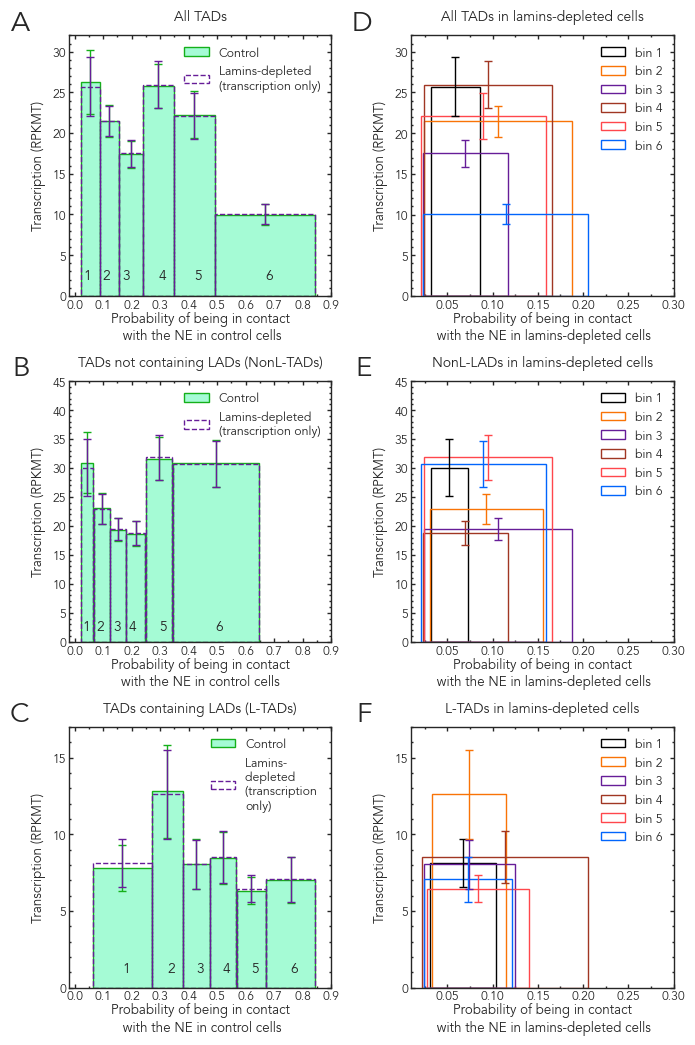

In [23]:
# Import required packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm
import matplotlib.font_manager as fm
from matplotlib.gridspec import GridSpec
import math

# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['lines.linewidth']= 1
mpl.rcParams['mathtext.default'] = 'regular'
#Size of ticks and width
sztmj=3
sztmm=1.5
wtick=1

#Size of letters (A,B,C)
fontsizeL=20

markersizeD=1

#Pad between ticks and  values
padsize=2

fig, ax1000 = plt.subplots(3, 2, figsize=(17.8/2.54, 1.5*17.8/(2.54)))
scale_transcr=1
scale_y=scale_transcr
scale_y1=1

# NonL_TADs (WT) on WT binning
width_ne01=[Width_Bin1_NonL_TADs_WT_Binning,
            Width_Bin2_NonL_TADs_WT_Binning,
            Width_Bin3_NonL_TADs_WT_Binning,
            Width_Bin4_NonL_TADs_WT_Binning,
            Width_Bin5_NonL_TADs_WT_Binning,
            Width_Bin6_NonL_TADs_WT_Binning]

x_mean_ne01=[Xmean_Bin1_NonL_TADs_WT_Binning,
             Xmean_Bin2_NonL_TADs_WT_Binning,
             Xmean_Bin3_NonL_TADs_WT_Binning,
             Xmean_Bin4_NonL_TADs_WT_Binning,
             Xmean_Bin5_NonL_TADs_WT_Binning,
             Xmean_Bin6_NonL_TADs_WT_Binning]


y_mean_ne01=[Bin1_NonL_TADs_WT_RPKMT_mean,
             Bin2_NonL_TADs_WT_RPKMT_mean,
             Bin3_NonL_TADs_WT_RPKMT_mean,
             Bin4_NonL_TADs_WT_RPKMT_mean,
             Bin5_NonL_TADs_WT_RPKMT_mean,
             Bin6_NonL_TADs_WT_RPKMT_mean]

error_ne01=[Bin1_NonL_TADs_WT_RPKMT_sem,
            Bin2_NonL_TADs_WT_RPKMT_sem,
            Bin3_NonL_TADs_WT_RPKMT_sem,
            Bin4_NonL_TADs_WT_RPKMT_sem,
            Bin5_NonL_TADs_WT_RPKMT_sem,
            Bin6_NonL_TADs_WT_RPKMT_sem]

#NonL_TADs (Mut) on WT  binning
y_mean_ne02=[Bin1_NonL_TADs_Mut_RPKMT_mean,
             Bin2_NonL_TADs_Mut_RPKMT_mean,
             Bin3_NonL_TADs_Mut_RPKMT_mean,
             Bin4_NonL_TADs_Mut_RPKMT_mean,
             Bin5_NonL_TADs_Mut_RPKMT_mean,
             Bin6_NonL_TADs_Mut_RPKMT_mean]

error_ne02=[Bin1_NonL_TADs_Mut_RPKMT_sem,
            Bin2_NonL_TADs_Mut_RPKMT_sem,
            Bin3_NonL_TADs_Mut_RPKMT_sem,
            Bin4_NonL_TADs_Mut_RPKMT_sem,
            Bin5_NonL_TADs_Mut_RPKMT_sem,
            Bin6_NonL_TADs_Mut_RPKMT_sem]

#All TADs (WT) on WT binning
scale_y11=1
width_ne011=[Width_Bin1_ALLTADs_WT_Binning,
             Width_Bin2_ALLTADs_WT_Binning,
             Width_Bin3_ALLTADs_WT_Binning,
             Width_Bin4_ALLTADs_WT_Binning,
             Width_Bin5_ALLTADs_WT_Binning,
             Width_Bin6_ALLTADs_WT_Binning]
x_mean_ne011=[Xmean_Bin1_ALLTADs_WT_Binning,
              Xmean_Bin2_ALLTADs_WT_Binning,
              Xmean_Bin3_ALLTADs_WT_Binning,
              Xmean_Bin4_ALLTADs_WT_Binning,
              Xmean_Bin5_ALLTADs_WT_Binning,
              Xmean_Bin6_ALLTADs_WT_Binning]
y_mean_ne011=[Bin1_AllTADs_WT_RPKMT_mean,
              Bin2_AllTADs_WT_RPKMT_mean,
              Bin3_AllTADs_WT_RPKMT_mean,
              Bin4_AllTADs_WT_RPKMT_mean,
              Bin5_AllTADs_WT_RPKMT_mean,
              Bin6_AllTADs_WT_RPKMT_mean]
error_ne011=[Bin1_AllTADs_WT_RPKMT_sem,
             Bin2_AllTADs_WT_RPKMT_sem,
             Bin3_AllTADs_WT_RPKMT_sem,
             Bin4_AllTADs_WT_RPKMT_sem,
             Bin5_AllTADs_WT_RPKMT_sem,
             Bin6_AllTADs_WT_RPKMT_sem]
#All TADs (Mut) on WT binning
y_mean_ne012=[Bin1_AllTADs_Mut_RPKMT_mean,
              Bin2_AllTADs_Mut_RPKMT_mean,
              Bin3_AllTADs_Mut_RPKMT_mean,
              Bin4_AllTADs_Mut_RPKMT_mean,
              Bin5_AllTADs_Mut_RPKMT_mean,
              Bin6_AllTADs_Mut_RPKMT_mean]
error_ne012=[Bin1_AllTADs_Mut_RPKMT_sem,
             Bin2_AllTADs_Mut_RPKMT_sem,
             Bin3_AllTADs_Mut_RPKMT_sem,
             Bin4_AllTADs_Mut_RPKMT_sem,
             Bin5_AllTADs_Mut_RPKMT_sem,
             Bin6_AllTADs_Mut_RPKMT_sem]
color1='xkcd:green'
color11='xkcd:black'
color2='xkcd:pale turquoise'
color21='xkcd:orange'
color3='#661D98'

color4="xkcd:brick"
color5="xkcd:light red"
color6="xkcd:bright blue"




#All TADS
ax1000[0,0].bar(x_mean_ne011[0], y_mean_ne011[0], yerr=error_ne011[0], width=width_ne011[0], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2, alpha=1 ,label='Control')
ax1000[0,0].bar(x_mean_ne011[1], y_mean_ne011[1], yerr=error_ne011[1], width=width_ne011[1], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2, alpha=1)
ax1000[0,0].bar(x_mean_ne011[2], y_mean_ne011[2], yerr=error_ne011[2], width=width_ne011[2], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2, alpha=1)
ax1000[0,0].bar(x_mean_ne011[3], y_mean_ne011[3], yerr=error_ne011[3], width=width_ne011[3], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2, alpha=1)
ax1000[0,0].bar(x_mean_ne011[4], y_mean_ne011[4], yerr=error_ne011[4], width=width_ne011[4], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2, alpha=1)
ax1000[0,0].bar(x_mean_ne011[5], y_mean_ne011[5], yerr=error_ne011[5], width=width_ne011[5], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2, alpha=1)

ax1000[0,0].bar(x_mean_ne011[0], y_mean_ne012[0], yerr=error_ne012[0], width=width_ne011[0], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None', alpha=1, linestyle='--',label='Lamins-depleted \n(transcription only)')
ax1000[0,0].bar(x_mean_ne011[1], y_mean_ne012[1], yerr=error_ne012[1], width=width_ne011[1], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')
ax1000[0,0].bar(x_mean_ne011[2], y_mean_ne012[2], yerr=error_ne012[2], width=width_ne011[2], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')
ax1000[0,0].bar(x_mean_ne011[3], y_mean_ne012[3], yerr=error_ne012[3], width=width_ne011[3], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')
ax1000[0,0].bar(x_mean_ne011[4], y_mean_ne012[4], yerr=error_ne012[4], width=width_ne011[4], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')
ax1000[0,0].bar(x_mean_ne011[5], y_mean_ne012[5], yerr=error_ne012[5], width=width_ne011[5], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')

ax1000[0,0].text(x_mean_ne011[0]-(width_ne011[0])/3, 2, '1', fontdict=None)
ax1000[0,0].text(x_mean_ne011[1]-(width_ne011[1])/3, 2, '2', fontdict=None )
ax1000[0,0].text(x_mean_ne011[2]-(width_ne011[2])/3, 2, '3', fontdict=None)
ax1000[0,0].text(x_mean_ne011[3], 2, '4', fontdict=None)
ax1000[0,0].text(x_mean_ne011[4], 2, '5', fontdict=None )
ax1000[0,0].text(x_mean_ne011[5], 2, '6', fontdict=None )








#Non-LTADs
ax1000[1,0].bar(x_mean_ne01[0], y_mean_ne01[0], yerr=error_ne01[0], width=width_ne01[0], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2, alpha=1,label='Control')
ax1000[1,0].bar(x_mean_ne01[1], y_mean_ne01[1], yerr=error_ne01[1], width=width_ne01[1], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2,alpha=1)
ax1000[1,0].bar(x_mean_ne01[2], y_mean_ne01[2], yerr=error_ne01[2], width=width_ne01[2], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2,alpha=1)
ax1000[1,0].bar(x_mean_ne01[3], y_mean_ne01[3], yerr=error_ne01[3], width=width_ne01[3], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2,alpha=1)
ax1000[1,0].bar(x_mean_ne01[4], y_mean_ne01[4], yerr=error_ne01[4], width=width_ne01[4], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2,alpha=1)
ax1000[1,0].bar(x_mean_ne01[5], y_mean_ne01[5], yerr=error_ne01[5], width=width_ne01[5], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2,alpha=1)



ax1000[1,0].bar(x_mean_ne01[0], y_mean_ne02[0], yerr=error_ne02[0], width=width_ne01[0], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None', alpha=1, linestyle='--', label='Lamins-depleted \n(transcription only)')
ax1000[1,0].bar(x_mean_ne01[1], y_mean_ne02[1], yerr=error_ne02[1], width=width_ne01[1], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')
ax1000[1,0].bar(x_mean_ne01[2], y_mean_ne02[2], yerr=error_ne02[2], width=width_ne01[2], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')
ax1000[1,0].bar(x_mean_ne01[3], y_mean_ne02[3], yerr=error_ne02[3], width=width_ne01[3], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')
ax1000[1,0].bar(x_mean_ne01[4], y_mean_ne02[4], yerr=error_ne02[4], width=width_ne01[4], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')
ax1000[1,0].bar(x_mean_ne01[5], y_mean_ne02[5], yerr=error_ne02[5], width=width_ne01[5], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')


ax1000[1,0].text(x_mean_ne01[0]-(width_ne01[0])/3, 2, '1', fontdict=None)
ax1000[1,0].text(x_mean_ne01[1]-(width_ne01[1])/3, 2, '2', fontdict=None )
ax1000[1,0].text(x_mean_ne01[2]-(width_ne01[2])/3, 2, '3', fontdict=None)
ax1000[1,0].text(x_mean_ne01[3]-(width_ne01[3])/3, 2, '4', fontdict=None)
ax1000[1,0].text(x_mean_ne01[4], 2, '5', fontdict=None )
ax1000[1,0].text(x_mean_ne01[5], 2, '6', fontdict=None )


#Non LTADs (same bins) on Mut binning

width_ne0111=[Width_Bin1_NonL_TADs_WT_Binning_Mut_Probability,
              Width_Bin2_NonL_TADs_WT_Binning_Mut_Probability,
              Width_Bin3_NonL_TADs_WT_Binning_Mut_Probability,
              Width_Bin4_NonL_TADs_WT_Binning_Mut_Probability,
              Width_Bin5_NonL_TADs_WT_Binning_Mut_Probability,
              Width_Bin6_NonL_TADs_WT_Binning_Mut_Probability]
x_mean_ne0111=[Xmean_Bin1_NonL_TADs_WT_Binning_Mut_Probability,
               Xmean_Bin2_NonL_TADs_WT_Binning_Mut_Probability,
               Xmean_Bin3_NonL_TADs_WT_Binning_Mut_Probability,
               Xmean_Bin4_NonL_TADs_WT_Binning_Mut_Probability,
               Xmean_Bin5_NonL_TADs_WT_Binning_Mut_Probability,
               Xmean_Bin6_NonL_TADs_WT_Binning_Mut_Probability]

ax1000[1,1].bar(x_mean_ne0111[0], y_mean_ne02[0], yerr=error_ne02[0], width=width_ne0111[0], align='center', capsize=3, linewidth=1, edgecolor=color11, ecolor=color11, color='None', alpha=1,label='bin 1')
ax1000[1,1].bar(x_mean_ne0111[1], y_mean_ne02[1], yerr=error_ne02[1], width=width_ne0111[1], align='center', capsize=3, linewidth=1, edgecolor=color21, ecolor=color21, color='None',alpha=1,label='bin 2')
ax1000[1,1].bar(x_mean_ne0111[2], y_mean_ne02[2], yerr=error_ne02[2], width=width_ne0111[2], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, label='bin 3')
ax1000[1,1].bar(x_mean_ne0111[3], y_mean_ne02[3], yerr=error_ne02[3], width=width_ne0111[3], align='center', capsize=3, linewidth=1, edgecolor=color4, ecolor=color4, color='None',alpha=1, label='bin 4')
ax1000[1,1].bar(x_mean_ne0111[4], y_mean_ne02[4], yerr=error_ne02[4], width=width_ne0111[4], align='center', capsize=3, linewidth=1, edgecolor=color5, ecolor=color5, color='None',alpha=1, label='bin 5')
ax1000[1,1].bar(x_mean_ne0111[5], y_mean_ne02[5], yerr=error_ne02[5], width=width_ne0111[5], align='center', capsize=3, linewidth=1, edgecolor=color6, ecolor=color6, color='None',alpha=1, label='bin 6')










#Same beads All TADS (Mut) on Mut probabilities)

width_ne04=[Width_Bin1_ALLTADs_WT_Binning_Mut_Probability,
            Width_Bin2_ALLTADs_WT_Binning_Mut_Probability,
            Width_Bin3_ALLTADs_WT_Binning_Mut_Probability,
            Width_Bin4_ALLTADs_WT_Binning_Mut_Probability,
            Width_Bin5_ALLTADs_WT_Binning_Mut_Probability,
            Width_Bin6_ALLTADs_WT_Binning_Mut_Probability]

x_mean_ne04=[Xmean_Bin1_ALLTADs_WT_Binning_Mut_Probability,
             Xmean_Bin2_ALLTADs_WT_Binning_Mut_Probability,
             Xmean_Bin3_ALLTADs_WT_Binning_Mut_Probability,
             Xmean_Bin4_ALLTADs_WT_Binning_Mut_Probability,
             Xmean_Bin5_ALLTADs_WT_Binning_Mut_Probability,
             Xmean_Bin6_ALLTADs_WT_Binning_Mut_Probability]


# L-TADs  (WT) on WT binning)
width_ne05=[Width_Bin1_LTADs_WT_Binning,
            Width_Bin2_LTADs_WT_Binning,
            Width_Bin3_LTADs_WT_Binning,
            Width_Bin4_LTADs_WT_Binning,
            Width_Bin5_LTADs_WT_Binning,
            Width_Bin6_LTADs_WT_Binning]
x_mean_ne05=[Xmean_Bin1_LTADs_WT_Binning,
             Xmean_Bin2_LTADs_WT_Binning,
             Xmean_Bin3_LTADs_WT_Binning,
             Xmean_Bin4_LTADs_WT_Binning,
             Xmean_Bin5_LTADs_WT_Binning,
             Xmean_Bin6_LTADs_WT_Binning]
y_mean_ne05=[Bin1_LTADs_WT_RPKMT_mean,
             Bin2_LTADs_WT_RPKMT_mean,
             Bin3_LTADs_WT_RPKMT_mean,
             Bin4_LTADs_WT_RPKMT_mean,
             Bin5_LTADs_WT_RPKMT_mean,
             Bin6_LTADs_WT_RPKMT_mean]
error_ne05=[Bin1_LTADs_WT_RPKMT_sem,
            Bin2_LTADs_WT_RPKMT_sem,
            Bin3_LTADs_WT_RPKMT_sem,
            Bin4_LTADs_WT_RPKMT_sem,
            Bin5_LTADs_WT_RPKMT_sem,
            Bin6_LTADs_WT_RPKMT_sem]

# L-TADs  (Mut transcription) on WT binning)

y_mean_ne051=[Bin1_LTADs_Mut_RPKMT_mean,
              Bin2_LTADs_Mut_RPKMT_mean,
              Bin3_LTADs_Mut_RPKMT_mean,
              Bin4_LTADs_Mut_RPKMT_mean,
              Bin5_LTADs_Mut_RPKMT_mean,
              Bin6_LTADs_Mut_RPKMT_mean]

error_ne051=[Bin1_LTADs_Mut_RPKMT_sem,
             Bin2_LTADs_Mut_RPKMT_sem,
             Bin3_LTADs_Mut_RPKMT_sem,
             Bin4_LTADs_Mut_RPKMT_sem,
             Bin5_LTADs_Mut_RPKMT_sem,
             Bin6_LTADs_Mut_RPKMT_sem]





ax1000[0,1].bar(x_mean_ne04[0], y_mean_ne012[0], yerr=error_ne012[0], width=width_ne04[0], align='center', capsize=3, linewidth=1, edgecolor=color11, ecolor=color11, color='None', alpha=1, label='bin 1')
ax1000[0,1].bar(x_mean_ne04[1], y_mean_ne012[1], yerr=error_ne012[1], width=width_ne04[1], align='center', capsize=3, linewidth=1, edgecolor=color21, ecolor=color21, color='None', alpha=1, label='bin 2' )
ax1000[0,1].bar(x_mean_ne04[2], y_mean_ne012[2], yerr=error_ne012[2], width=width_ne04[2], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None', alpha=1, label='bin 3')
ax1000[0,1].bar(x_mean_ne04[3], y_mean_ne012[3], yerr=error_ne012[3], width=width_ne04[3], align='center', capsize=3, linewidth=1, edgecolor=color4, ecolor=color4, color='None', alpha=1, label='bin 4')
ax1000[0,1].bar(x_mean_ne04[4], y_mean_ne012[4], yerr=error_ne012[4], width=width_ne04[4], align='center', capsize=3, linewidth=1, edgecolor=color5, ecolor=color5, color='None', alpha=1, label='bin 5')
ax1000[0,1].bar(x_mean_ne04[5], y_mean_ne012[5], yerr=error_ne012[5], width=width_ne04[5], align='center', capsize=3, linewidth=1, edgecolor=color6, ecolor=color6, color='None', alpha=1, label='bin 6')

#L-TADs
ax1000[2,0].bar(x_mean_ne05[0], y_mean_ne05[0], yerr=error_ne05[0], width=width_ne05[0], align='center', capsize=3, linewidth=1,edgecolor=color1, ecolor=color1, color=color2,alpha=1, label='Control')
ax1000[2,0].bar(x_mean_ne05[1], y_mean_ne05[1], yerr=error_ne05[1], width=width_ne05[1], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2, alpha=1)
ax1000[2,0].bar(x_mean_ne05[2], y_mean_ne05[2], yerr=error_ne05[2], width=width_ne05[2], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2, alpha=1)
ax1000[2,0].bar(x_mean_ne05[3], y_mean_ne05[3], yerr=error_ne05[3], width=width_ne05[3], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2, alpha=1)
ax1000[2,0].bar(x_mean_ne05[4], y_mean_ne05[4], yerr=error_ne05[4], width=width_ne05[4], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2, alpha=1)
ax1000[2,0].bar(x_mean_ne05[5], y_mean_ne05[5], yerr=error_ne05[5], width=width_ne05[5], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2, alpha=1)


ax1000[2,0].bar(x_mean_ne05[0], y_mean_ne051[0], yerr=error_ne051[0], width=width_ne05[0], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None', alpha=1, linestyle='--',label='Lamins- \ndepleted \n(transcription \nonly)')
ax1000[2,0].bar(x_mean_ne05[1], y_mean_ne051[1], yerr=error_ne051[1], width=width_ne05[1], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3,color='None',alpha=1, linestyle='--')
ax1000[2,0].bar(x_mean_ne05[2], y_mean_ne051[2], yerr=error_ne051[2], width=width_ne05[2], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')
ax1000[2,0].bar(x_mean_ne05[3], y_mean_ne051[3], yerr=error_ne051[3], width=width_ne05[3], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')
ax1000[2,0].bar(x_mean_ne05[4], y_mean_ne051[4], yerr=error_ne051[4], width=width_ne05[4], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')
ax1000[2,0].bar(x_mean_ne05[5], y_mean_ne051[5], yerr=error_ne051[5], width=width_ne05[5], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')

ax1000[2,0].text(x_mean_ne05[0], 1, '1', fontdict=None )
ax1000[2,0].text(x_mean_ne05[1], 1, '2', fontdict=None )
ax1000[2,0].text(x_mean_ne05[2], 1, '3', fontdict=None )
ax1000[2,0].text(x_mean_ne05[3], 1, '4', fontdict=None )
ax1000[2,0].text(x_mean_ne05[4], 1, '5', fontdict=None )
ax1000[2,0].text(x_mean_ne05[5], 1, '6', fontdict=None )


#L_TADs (same bins)  Mut transcription on Mut probabilities 

width_ne051=[Width_Bin1_LTADs_WT_Binning_Mut_Probability,
             Width_Bin2_LTADs_WT_Binning_Mut_Probability,
             Width_Bin3_LTADs_WT_Binning_Mut_Probability,
             Width_Bin4_LTADs_WT_Binning_Mut_Probability,
             Width_Bin5_LTADs_WT_Binning_Mut_Probability,
             Width_Bin6_LTADs_WT_Binning_Mut_Probability]

x_mean_ne051=[Xmean_Bin1_LTADs_WT_Binning_Mut_Probability,
              Xmean_Bin2_LTADs_WT_Binning_Mut_Probability,
              Xmean_Bin3_LTADs_WT_Binning_Mut_Probability,
              Xmean_Bin4_LTADs_WT_Binning_Mut_Probability,
              Xmean_Bin5_LTADs_WT_Binning_Mut_Probability,
              Xmean_Bin6_LTADs_WT_Binning_Mut_Probability]


ax1000[2,1].bar(x_mean_ne051[0], y_mean_ne051[0], yerr=error_ne051[0], width=width_ne051[0], align='center', capsize=3, linewidth=1, edgecolor=color11, ecolor=color11, color='None', alpha=1, label='bin 1')
ax1000[2,1].bar(x_mean_ne051[1], y_mean_ne051[1], yerr=error_ne051[1], width=width_ne051[1], align='center', capsize=3, linewidth=1, edgecolor=color21, ecolor=color21,color='None',alpha=1, label='bin 2')
ax1000[2,1].bar(x_mean_ne051[2], y_mean_ne051[2], yerr=error_ne051[2], width=width_ne051[2], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, label='bin 3')
ax1000[2,1].bar(x_mean_ne051[3], y_mean_ne051[3], yerr=error_ne051[3], width=width_ne051[3], align='center', capsize=3, linewidth=1, edgecolor=color4, ecolor=color4, color='None',alpha=1, label='bin 4')
ax1000[2,1].bar(x_mean_ne051[4], y_mean_ne051[4], yerr=error_ne051[4], width=width_ne051[4], align='center', capsize=3, linewidth=1, edgecolor=color5, ecolor=color5, color='None',alpha=1, label='bin 5')
ax1000[2,1].bar(x_mean_ne051[5], y_mean_ne051[5], yerr=error_ne051[5], width=width_ne051[5], align='center', capsize=3, linewidth=1, edgecolor=color6, ecolor=color6, color='None',alpha=1, label='bin 6')



# Set the axis limits
ax1000[1,0].set_xlim(-0.02, 0.9)
ax1000[0,1].set_xlim(0.01, 0.3)
ax1000[1,0].set_ylim(0, 45)
ax1000[0,1].set_ylim(0, 32)
ax1000[0,0].set_ylim(-0.02, 32)
ax1000[2,0].set_ylim(0, 17)
ax1000[0,0].set_xlim(-0.02, 0.9)
ax1000[2,0].set_xlim(-0.02, 0.9)




ax1000[1,1].set_ylim(0, 45)
ax1000[2,1].set_ylim(0, 17)
ax1000[1,1].set_xlim(0.01, 0.3)
ax1000[2,1].set_xlim(0.01, 0.3)



ax1000[1,0].set_ylabel('Transcription (RPKMT)', labelpad=5)
ax1000[1,0].set_xlabel('Probability of being in contact\nwith the NE in control cells', labelpad=0.01)

ax1000[0,1].set_ylabel('Transcription (RPKMT)', labelpad=5)
ax1000[0,1].set_xlabel('Probability of being in contact\n with the NE in lamins-depleted cells', labelpad=0.01)



ax1000[0,0].set_ylabel('Transcription (RPKMT)', labelpad=5)
ax1000[0,0].set_xlabel('Probability of being in contact\n with the NE in control cells', labelpad=0.01)

ax1000[2,0].set_ylabel('Transcription (RPKMT)', labelpad=5)
ax1000[2,0].set_xlabel('Probability of being in contact\n with the NE in control cells', labelpad=0.01)




ax1000[1,1].set_ylabel('Transcription (RPKMT)', labelpad=5)
ax1000[1,1].set_xlabel('Probability of being in contact\n with the NE in lamins-depleted cells', labelpad=0.01)

ax1000[2,1].set_ylabel('Transcription (RPKMT)', labelpad=5)
ax1000[2,1].set_xlabel('Probability of being in contact\n with the NE in lamins-depleted cells', labelpad=0.01)



ax1000[0,0].text(-0.15, 1.1, "A", transform=ax1000[0,0].transAxes,
      fontsize=fontsizeL, fontweight='bold', va='top', ha='right')
ax1000[0,1].text(-0.15, 1.1, "D", transform=ax1000[0,1].transAxes,
      fontsize=fontsizeL, fontweight='bold', va='top', ha='right')

ax1000[1,0].text(-0.15, 1.1, "B", transform=ax1000[1,0].transAxes,
      fontsize=fontsizeL, fontweight='bold', va='top', ha='right')
ax1000[1,1].text(-0.15, 1.1, "E", transform=ax1000[1,1].transAxes,
     fontsize=fontsizeL, fontweight='bold', va='top', ha='right')


ax1000[2,0].text(-0.15, 1.1, "C", transform=ax1000[2,0].transAxes,
      fontsize=fontsizeL, fontweight='bold', va='top', ha='right')

ax1000[2,1].text(-0.15, 1.1, "F", transform=ax1000[2,1].transAxes,
     fontsize=fontsizeL, fontweight='bold', va='top', ha='right')


for i in range(3):
    for j in range(2):
        ax1000[i,j].xaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', top='on',pad=padsize)
        ax1000[i,j].xaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', top='on',pad=padsize)
        ax1000[i,j].yaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
        ax1000[i,j].yaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
        ax1000[i,j].xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
        ax1000[i,j].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
        ax1000[i,j].yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
        ax1000[i,j].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))



ax1000[0,1].xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.05))
ax1000[0,1].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.025))
ax1000[0,1].yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax1000[0,1].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))


ax1000[1,1].xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.05))
ax1000[1,1].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.025))
ax1000[1,1].yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax1000[1,1].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))



ax1000[2,1].xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.05))
ax1000[2,1].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.025))
ax1000[2,1].yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax1000[2,1].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))





ax1000[0,0].text(0.5, 1.1, "All TADs", transform=ax1000[0,0].transAxes,
      fontdict=None, fontweight='bold', va='top', ha='center')

ax1000[2,0].text(0.5, 1.1, "TADs containing LADs (L-TADs)", transform=ax1000[2,0].transAxes,
      fontdict=None, fontweight='bold', va='top', ha='center')

ax1000[1,0].text(0.5, 1.1, "TADs not containing LADs (NonL-TADs)", transform=ax1000[1,0].transAxes,
      fontdict=None, fontweight='bold', va='top', ha='center')

ax1000[0,1].text(0.5, 1.1, "All TADs in lamins-depleted cells", transform=ax1000[0,1].transAxes,
      fontdict=None, fontweight='bold', va='top', ha='center')




ax1000[1,1].text(0.5, 1.1, "NonL-LADs in lamins-depleted cells", transform=ax1000[1,1].transAxes,
      fontdict=None, fontweight='bold', va='top', ha='center')

ax1000[2,1].text(0.5, 1.1, "L-TADs in lamins-depleted cells", transform=ax1000[2,1].transAxes,
      fontdict=None, fontweight='bold', va='top', ha='center')



ax1000[1,0].legend(bbox_to_anchor=(1.0, 1.0), loc=1, frameon=False)
ax1000[0,1].legend(bbox_to_anchor=(1.0, 1.0), loc=1, frameon=False)
ax1000[0,0].legend(bbox_to_anchor=(1.0, 1.0), loc=1, frameon=False)
ax1000[1,1].legend(bbox_to_anchor=(1.0, 1.0), loc=1, frameon=False)
ax1000[2,1].legend(bbox_to_anchor=(1.0, 1.0), loc=1, frameon=False)

ax1000[2,0].legend(bbox_to_anchor=(1.0, 1.0), loc=1, frameon=False)
plt.tight_layout(pad=1)

# Save figure
plt.savefig('Main_Fig_RPKMT.png', dpi=1200, transparent=False, bbox_inches='tight')
#plt.show()


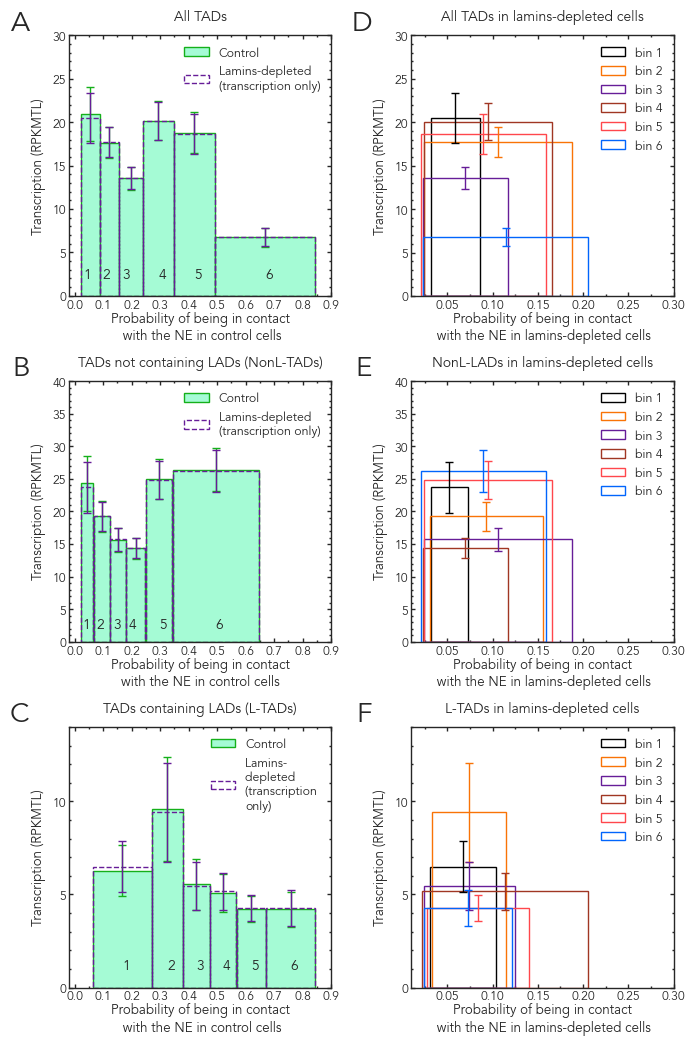

In [24]:
# Import required packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm
import matplotlib.font_manager as fm
from matplotlib.gridspec import GridSpec
import math

# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['lines.linewidth']= 1
mpl.rcParams['mathtext.default'] = 'regular'
#Size of ticks and width
sztmj=3
sztmm=1.5
wtick=1

#Size of letters (A,B,C)
fontsizeL=20

markersizeD=1

#Pad between ticks and  values
padsize=2

fig, ax1001 = plt.subplots(3, 2, figsize=(17.8/2.54, 1.5*17.8/(2.54)))
scale_transcr=1
scale_y=scale_transcr
scale_y1=1

# NonL_TADs (WT) on WT binning
width_ne01=[Width_Bin1_NonL_TADs_WT_Binning,
            Width_Bin2_NonL_TADs_WT_Binning,
            Width_Bin3_NonL_TADs_WT_Binning,
            Width_Bin4_NonL_TADs_WT_Binning,
            Width_Bin5_NonL_TADs_WT_Binning,
            Width_Bin6_NonL_TADs_WT_Binning]

x_mean_ne01=[Xmean_Bin1_NonL_TADs_WT_Binning,
             Xmean_Bin2_NonL_TADs_WT_Binning,
             Xmean_Bin3_NonL_TADs_WT_Binning,
             Xmean_Bin4_NonL_TADs_WT_Binning,
             Xmean_Bin5_NonL_TADs_WT_Binning,
             Xmean_Bin6_NonL_TADs_WT_Binning]


y_mean_ne01=[Bin1_NonL_TADs_WT_RPKMTL_mean,
             Bin2_NonL_TADs_WT_RPKMTL_mean,
             Bin3_NonL_TADs_WT_RPKMTL_mean,
             Bin4_NonL_TADs_WT_RPKMTL_mean,
             Bin5_NonL_TADs_WT_RPKMTL_mean,
             Bin6_NonL_TADs_WT_RPKMTL_mean]

error_ne01=[Bin1_NonL_TADs_WT_RPKMTL_sem,
            Bin2_NonL_TADs_WT_RPKMTL_sem,
            Bin3_NonL_TADs_WT_RPKMTL_sem,
            Bin4_NonL_TADs_WT_RPKMTL_sem,
            Bin5_NonL_TADs_WT_RPKMTL_sem,
            Bin6_NonL_TADs_WT_RPKMTL_sem]

#NonL_TADs (Mut) on WT  binning
y_mean_ne02=[Bin1_NonL_TADs_Mut_RPKMTL_mean,
             Bin2_NonL_TADs_Mut_RPKMTL_mean,
             Bin3_NonL_TADs_Mut_RPKMTL_mean,
             Bin4_NonL_TADs_Mut_RPKMTL_mean,
             Bin5_NonL_TADs_Mut_RPKMTL_mean,
             Bin6_NonL_TADs_Mut_RPKMTL_mean]

error_ne02=[Bin1_NonL_TADs_Mut_RPKMTL_sem,
            Bin2_NonL_TADs_Mut_RPKMTL_sem,
            Bin3_NonL_TADs_Mut_RPKMTL_sem,
            Bin4_NonL_TADs_Mut_RPKMTL_sem,
            Bin5_NonL_TADs_Mut_RPKMTL_sem,
            Bin6_NonL_TADs_Mut_RPKMTL_sem]

#All TADs (WT) on WT binning
scale_y11=1
width_ne011=[Width_Bin1_ALLTADs_WT_Binning,
             Width_Bin2_ALLTADs_WT_Binning,
             Width_Bin3_ALLTADs_WT_Binning,
             Width_Bin4_ALLTADs_WT_Binning,
             Width_Bin5_ALLTADs_WT_Binning,
             Width_Bin6_ALLTADs_WT_Binning]
x_mean_ne011=[Xmean_Bin1_ALLTADs_WT_Binning,
              Xmean_Bin2_ALLTADs_WT_Binning,
              Xmean_Bin3_ALLTADs_WT_Binning,
              Xmean_Bin4_ALLTADs_WT_Binning,
              Xmean_Bin5_ALLTADs_WT_Binning,
              Xmean_Bin6_ALLTADs_WT_Binning]
y_mean_ne011=[Bin1_AllTADs_WT_RPKMTL_mean,
              Bin2_AllTADs_WT_RPKMTL_mean,
              Bin3_AllTADs_WT_RPKMTL_mean,
              Bin4_AllTADs_WT_RPKMTL_mean,
              Bin5_AllTADs_WT_RPKMTL_mean,
              Bin6_AllTADs_WT_RPKMTL_mean]
error_ne011=[Bin1_AllTADs_WT_RPKMTL_sem,
             Bin2_AllTADs_WT_RPKMTL_sem,
             Bin3_AllTADs_WT_RPKMTL_sem,
             Bin4_AllTADs_WT_RPKMTL_sem,
             Bin5_AllTADs_WT_RPKMTL_sem,
             Bin6_AllTADs_WT_RPKMTL_sem]
#All TADs (Mut) on WT binning
y_mean_ne012=[Bin1_AllTADs_Mut_RPKMTL_mean,
              Bin2_AllTADs_Mut_RPKMTL_mean,
              Bin3_AllTADs_Mut_RPKMTL_mean,
              Bin4_AllTADs_Mut_RPKMTL_mean,
              Bin5_AllTADs_Mut_RPKMTL_mean,
              Bin6_AllTADs_Mut_RPKMTL_mean]
error_ne012=[Bin1_AllTADs_Mut_RPKMTL_sem,
             Bin2_AllTADs_Mut_RPKMTL_sem,
             Bin3_AllTADs_Mut_RPKMTL_sem,
             Bin4_AllTADs_Mut_RPKMTL_sem,
             Bin5_AllTADs_Mut_RPKMTL_sem,
             Bin6_AllTADs_Mut_RPKMTL_sem]
color1='xkcd:green'
color11='xkcd:black'
color2='xkcd:pale turquoise'
color21='xkcd:orange'
color3='#661D98'

color4="xkcd:brick"
color5="xkcd:light red"
color6="xkcd:bright blue"




#All TADS
ax1001[0,0].bar(x_mean_ne011[0], y_mean_ne011[0], yerr=error_ne011[0], width=width_ne011[0], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2, alpha=1,label='Control')
ax1001[0,0].bar(x_mean_ne011[1], y_mean_ne011[1], yerr=error_ne011[1], width=width_ne011[1], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2,alpha=1)
ax1001[0,0].bar(x_mean_ne011[2], y_mean_ne011[2], yerr=error_ne011[2], width=width_ne011[2], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2,alpha=1)
ax1001[0,0].bar(x_mean_ne011[3], y_mean_ne011[3], yerr=error_ne011[3], width=width_ne011[3], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2,alpha=1)
ax1001[0,0].bar(x_mean_ne011[4], y_mean_ne011[4], yerr=error_ne011[4], width=width_ne011[4], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2,alpha=1)
ax1001[0,0].bar(x_mean_ne011[5], y_mean_ne011[5], yerr=error_ne011[5], width=width_ne011[5], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2,alpha=1)

ax1001[0,0].bar(x_mean_ne011[0], y_mean_ne012[0], yerr=error_ne012[0], width=width_ne011[0], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None', alpha=1,linestyle='--',label='Lamins-depleted \n(transcription only)')
ax1001[0,0].bar(x_mean_ne011[1], y_mean_ne012[1], yerr=error_ne012[1], width=width_ne011[1], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')
ax1001[0,0].bar(x_mean_ne011[2], y_mean_ne012[2], yerr=error_ne012[2], width=width_ne011[2], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')
ax1001[0,0].bar(x_mean_ne011[3], y_mean_ne012[3], yerr=error_ne012[3], width=width_ne011[3], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')
ax1001[0,0].bar(x_mean_ne011[4], y_mean_ne012[4], yerr=error_ne012[4], width=width_ne011[4], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')
ax1001[0,0].bar(x_mean_ne011[5], y_mean_ne012[5], yerr=error_ne012[5], width=width_ne011[5], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')

ax1001[0,0].text(x_mean_ne011[0]-(width_ne011[0])/3, 2, '1', fontdict=None)
ax1001[0,0].text(x_mean_ne011[1]-(width_ne011[1])/3, 2, '2', fontdict=None )
ax1001[0,0].text(x_mean_ne011[2]-(width_ne011[2])/3, 2, '3', fontdict=None)
ax1001[0,0].text(x_mean_ne011[3], 2, '4', fontdict=None)
ax1001[0,0].text(x_mean_ne011[4], 2, '5', fontdict=None )
ax1001[0,0].text(x_mean_ne011[5], 2, '6', fontdict=None )



#Non-LTADs
ax1001[1,0].bar(x_mean_ne01[0], y_mean_ne01[0], yerr=error_ne01[0], width=width_ne01[0], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2, alpha=1,label='Control')
ax1001[1,0].bar(x_mean_ne01[1], y_mean_ne01[1], yerr=error_ne01[1], width=width_ne01[1], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2,alpha=1)
ax1001[1,0].bar(x_mean_ne01[2], y_mean_ne01[2], yerr=error_ne01[2], width=width_ne01[2], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2,alpha=1)
ax1001[1,0].bar(x_mean_ne01[3], y_mean_ne01[3], yerr=error_ne01[3], width=width_ne01[3], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2,alpha=1)
ax1001[1,0].bar(x_mean_ne01[4], y_mean_ne01[4], yerr=error_ne01[4], width=width_ne01[4], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2,alpha=1)
ax1001[1,0].bar(x_mean_ne01[5], y_mean_ne01[5], yerr=error_ne01[5], width=width_ne01[5], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2,alpha=1)



ax1001[1,0].bar(x_mean_ne01[0], y_mean_ne02[0], yerr=error_ne02[0], width=width_ne01[0], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None', alpha=1, linestyle='--',label='Lamins-depleted \n(transcription only)')
ax1001[1,0].bar(x_mean_ne01[1], y_mean_ne02[1], yerr=error_ne02[1], width=width_ne01[1], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')
ax1001[1,0].bar(x_mean_ne01[2], y_mean_ne02[2], yerr=error_ne02[2], width=width_ne01[2], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')
ax1001[1,0].bar(x_mean_ne01[3], y_mean_ne02[3], yerr=error_ne02[3], width=width_ne01[3], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')
ax1001[1,0].bar(x_mean_ne01[4], y_mean_ne02[4], yerr=error_ne02[4], width=width_ne01[4], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')
ax1001[1,0].bar(x_mean_ne01[5], y_mean_ne02[5], yerr=error_ne02[5], width=width_ne01[5], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')


ax1001[1,0].text(x_mean_ne01[0]-(width_ne01[0])/3, 2, '1', fontdict=None)
ax1001[1,0].text(x_mean_ne01[1]-(width_ne01[1])/3, 2, '2', fontdict=None )
ax1001[1,0].text(x_mean_ne01[2]-(width_ne01[2])/3, 2, '3', fontdict=None)
ax1001[1,0].text(x_mean_ne01[3]-(width_ne01[3])/3, 2, '4', fontdict=None)
ax1001[1,0].text(x_mean_ne01[4], 2, '5', fontdict=None )
ax1001[1,0].text(x_mean_ne01[5], 2, '6', fontdict=None )


#Non LTADs (same bins) on Mut binning

width_ne0111=[Width_Bin1_NonL_TADs_WT_Binning_Mut_Probability,
              Width_Bin2_NonL_TADs_WT_Binning_Mut_Probability,
              Width_Bin3_NonL_TADs_WT_Binning_Mut_Probability,
              Width_Bin4_NonL_TADs_WT_Binning_Mut_Probability,
              Width_Bin5_NonL_TADs_WT_Binning_Mut_Probability,
              Width_Bin6_NonL_TADs_WT_Binning_Mut_Probability]
x_mean_ne0111=[Xmean_Bin1_NonL_TADs_WT_Binning_Mut_Probability,
               Xmean_Bin2_NonL_TADs_WT_Binning_Mut_Probability,
               Xmean_Bin3_NonL_TADs_WT_Binning_Mut_Probability,
               Xmean_Bin4_NonL_TADs_WT_Binning_Mut_Probability,
               Xmean_Bin5_NonL_TADs_WT_Binning_Mut_Probability,
               Xmean_Bin6_NonL_TADs_WT_Binning_Mut_Probability]

ax1001[1,1].bar(x_mean_ne0111[0], y_mean_ne02[0], yerr=error_ne02[0], width=width_ne0111[0], align='center', capsize=3, linewidth=1, edgecolor=color11, ecolor=color11, color='None', alpha=1,label='bin 1')
ax1001[1,1].bar(x_mean_ne0111[1], y_mean_ne02[1], yerr=error_ne02[1], width=width_ne0111[1], align='center', capsize=3, linewidth=1, edgecolor=color21, ecolor=color21, color='None',alpha=1,label='bin 2')
ax1001[1,1].bar(x_mean_ne0111[2], y_mean_ne02[2], yerr=error_ne02[2], width=width_ne0111[2], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, label='bin 3')
ax1001[1,1].bar(x_mean_ne0111[3], y_mean_ne02[3], yerr=error_ne02[3], width=width_ne0111[3], align='center', capsize=3, linewidth=1, edgecolor=color4, ecolor=color4, color='None',alpha=1, label='bin 4')
ax1001[1,1].bar(x_mean_ne0111[4], y_mean_ne02[4], yerr=error_ne02[4], width=width_ne0111[4], align='center', capsize=3, linewidth=1, edgecolor=color5, ecolor=color5, color='None',alpha=1, label='bin 5')
ax1001[1,1].bar(x_mean_ne0111[5], y_mean_ne02[5], yerr=error_ne02[5], width=width_ne0111[5], align='center', capsize=3, linewidth=1, edgecolor=color6, ecolor=color6, color='None',alpha=1, label='bin 6')








#Same beads All TADS (Mut) on Mut probabilities)

width_ne04=[Width_Bin1_ALLTADs_WT_Binning_Mut_Probability,
            Width_Bin2_ALLTADs_WT_Binning_Mut_Probability,
            Width_Bin3_ALLTADs_WT_Binning_Mut_Probability,
            Width_Bin4_ALLTADs_WT_Binning_Mut_Probability,
            Width_Bin5_ALLTADs_WT_Binning_Mut_Probability,
            Width_Bin6_ALLTADs_WT_Binning_Mut_Probability]

x_mean_ne04=[Xmean_Bin1_ALLTADs_WT_Binning_Mut_Probability,
             Xmean_Bin2_ALLTADs_WT_Binning_Mut_Probability,
             Xmean_Bin3_ALLTADs_WT_Binning_Mut_Probability,
             Xmean_Bin4_ALLTADs_WT_Binning_Mut_Probability,
             Xmean_Bin5_ALLTADs_WT_Binning_Mut_Probability,
             Xmean_Bin6_ALLTADs_WT_Binning_Mut_Probability]


# L-TADs  (WT) on WT binning)
width_ne05=[Width_Bin1_LTADs_WT_Binning,
            Width_Bin2_LTADs_WT_Binning,
            Width_Bin3_LTADs_WT_Binning,
            Width_Bin4_LTADs_WT_Binning,
            Width_Bin5_LTADs_WT_Binning,
            Width_Bin6_LTADs_WT_Binning]
x_mean_ne05=[Xmean_Bin1_LTADs_WT_Binning,
             Xmean_Bin2_LTADs_WT_Binning,
             Xmean_Bin3_LTADs_WT_Binning,
             Xmean_Bin4_LTADs_WT_Binning,
             Xmean_Bin5_LTADs_WT_Binning,
             Xmean_Bin6_LTADs_WT_Binning]
y_mean_ne05=[Bin1_LTADs_WT_RPKMTL_mean,
             Bin2_LTADs_WT_RPKMTL_mean,
             Bin3_LTADs_WT_RPKMTL_mean,
             Bin4_LTADs_WT_RPKMTL_mean,
             Bin5_LTADs_WT_RPKMTL_mean,
             Bin6_LTADs_WT_RPKMTL_mean]
error_ne05=[Bin1_LTADs_WT_RPKMTL_sem,
            Bin2_LTADs_WT_RPKMTL_sem,
            Bin3_LTADs_WT_RPKMTL_sem,
            Bin4_LTADs_WT_RPKMTL_sem,
            Bin5_LTADs_WT_RPKMTL_sem,
            Bin6_LTADs_WT_RPKMTL_sem]

# L-TADs  (Mut transcription) on WT binning)

y_mean_ne051=[Bin1_LTADs_Mut_RPKMTL_mean,
              Bin2_LTADs_Mut_RPKMTL_mean,
              Bin3_LTADs_Mut_RPKMTL_mean,
              Bin4_LTADs_Mut_RPKMTL_mean,
              Bin5_LTADs_Mut_RPKMTL_mean,
              Bin6_LTADs_Mut_RPKMTL_mean]

error_ne051=[Bin1_LTADs_Mut_RPKMTL_sem,
             Bin2_LTADs_Mut_RPKMTL_sem,
             Bin3_LTADs_Mut_RPKMTL_sem,
             Bin4_LTADs_Mut_RPKMTL_sem,
             Bin5_LTADs_Mut_RPKMTL_sem,
             Bin6_LTADs_Mut_RPKMTL_sem]




ax1001[0,1].bar(x_mean_ne04[0], y_mean_ne012[0], yerr=error_ne012[0], width=width_ne04[0], align='center', capsize=3, linewidth=1, edgecolor=color11, ecolor=color11, color='None', alpha=1, label='bin 1')
ax1001[0,1].bar(x_mean_ne04[1], y_mean_ne012[1], yerr=error_ne012[1], width=width_ne04[1], align='center', capsize=3, linewidth=1, edgecolor=color21, ecolor=color21, color='None', alpha=1, label='bin 2' )
ax1001[0,1].bar(x_mean_ne04[2], y_mean_ne012[2], yerr=error_ne012[2], width=width_ne04[2], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None', alpha=1, label='bin 3')
ax1001[0,1].bar(x_mean_ne04[3], y_mean_ne012[3], yerr=error_ne012[3], width=width_ne04[3], align='center', capsize=3, linewidth=1, edgecolor=color4, ecolor=color4, color='None', alpha=1, label='bin 4')
ax1001[0,1].bar(x_mean_ne04[4], y_mean_ne012[4], yerr=error_ne012[4], width=width_ne04[4], align='center', capsize=3, linewidth=1, edgecolor=color5, ecolor=color5, color='None', alpha=1, label='bin 5')
ax1001[0,1].bar(x_mean_ne04[5], y_mean_ne012[5], yerr=error_ne012[5], width=width_ne04[5], align='center', capsize=3, linewidth=1, edgecolor=color6, ecolor=color6, color='None', alpha=1, label='bin 6')
#
#L-TADs
ax1001[2,0].bar(x_mean_ne05[0], y_mean_ne05[0], yerr=error_ne05[0], width=width_ne05[0], align='center', capsize=3, linewidth=1,edgecolor=color1, ecolor=color1, color=color2,alpha=1, label='Control')
ax1001[2,0].bar(x_mean_ne05[1], y_mean_ne05[1], yerr=error_ne05[1], width=width_ne05[1], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2, alpha=1)
ax1001[2,0].bar(x_mean_ne05[2], y_mean_ne05[2], yerr=error_ne05[2], width=width_ne05[2], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2, alpha=1)
ax1001[2,0].bar(x_mean_ne05[3], y_mean_ne05[3], yerr=error_ne05[3], width=width_ne05[3], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2, alpha=1)
ax1001[2,0].bar(x_mean_ne05[4], y_mean_ne05[4], yerr=error_ne05[4], width=width_ne05[4], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2, alpha=1)
ax1001[2,0].bar(x_mean_ne05[5], y_mean_ne05[5], yerr=error_ne05[5], width=width_ne05[5], align='center', capsize=3, linewidth=1, edgecolor=color1, ecolor=color1, color=color2, alpha=1)


ax1001[2,0].bar(x_mean_ne05[0], y_mean_ne051[0], yerr=error_ne051[0], width=width_ne05[0], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None', alpha=1,linestyle='--' ,label='Lamins- \ndepleted \n(transcription \nonly)')
ax1001[2,0].bar(x_mean_ne05[1], y_mean_ne051[1], yerr=error_ne051[1], width=width_ne05[1], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3,color='None',alpha=1, linestyle='--')
ax1001[2,0].bar(x_mean_ne05[2], y_mean_ne051[2], yerr=error_ne051[2], width=width_ne05[2], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')
ax1001[2,0].bar(x_mean_ne05[3], y_mean_ne051[3], yerr=error_ne051[3], width=width_ne05[3], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')
ax1001[2,0].bar(x_mean_ne05[4], y_mean_ne051[4], yerr=error_ne051[4], width=width_ne05[4], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')
ax1001[2,0].bar(x_mean_ne05[5], y_mean_ne051[5], yerr=error_ne051[5], width=width_ne05[5], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, linestyle='--')

ax1001[2,0].text(x_mean_ne05[0], 1, '1', fontdict=None )
ax1001[2,0].text(x_mean_ne05[1], 1, '2', fontdict=None )
ax1001[2,0].text(x_mean_ne05[2], 1, '3', fontdict=None )
ax1001[2,0].text(x_mean_ne05[3], 1, '4', fontdict=None )
ax1001[2,0].text(x_mean_ne05[4], 1, '5', fontdict=None )
ax1001[2,0].text(x_mean_ne05[5], 1, '6', fontdict=None )


#L_TADs (same bins)  Mut transcription on Mut probabilities 

width_ne051=[Width_Bin1_LTADs_WT_Binning_Mut_Probability,
             Width_Bin2_LTADs_WT_Binning_Mut_Probability,
             Width_Bin3_LTADs_WT_Binning_Mut_Probability,
             Width_Bin4_LTADs_WT_Binning_Mut_Probability,
             Width_Bin5_LTADs_WT_Binning_Mut_Probability,
             Width_Bin6_LTADs_WT_Binning_Mut_Probability]

x_mean_ne051=[Xmean_Bin1_LTADs_WT_Binning_Mut_Probability,
              Xmean_Bin2_LTADs_WT_Binning_Mut_Probability,
              Xmean_Bin3_LTADs_WT_Binning_Mut_Probability,
              Xmean_Bin4_LTADs_WT_Binning_Mut_Probability,
              Xmean_Bin5_LTADs_WT_Binning_Mut_Probability,
              Xmean_Bin6_LTADs_WT_Binning_Mut_Probability]


ax1001[2,1].bar(x_mean_ne051[0], y_mean_ne051[0], yerr=error_ne051[0], width=width_ne051[0], align='center', capsize=3, linewidth=1, edgecolor=color11, ecolor=color11, color='None', alpha=1, label='bin 1')
ax1001[2,1].bar(x_mean_ne051[1], y_mean_ne051[1], yerr=error_ne051[1], width=width_ne051[1], align='center', capsize=3, linewidth=1, edgecolor=color21, ecolor=color21,color='None',alpha=1, label='bin 2')
ax1001[2,1].bar(x_mean_ne051[2], y_mean_ne051[2], yerr=error_ne051[2], width=width_ne051[2], align='center', capsize=3, linewidth=1, edgecolor=color3, ecolor=color3, color='None',alpha=1, label='bin 3')
ax1001[2,1].bar(x_mean_ne051[3], y_mean_ne051[3], yerr=error_ne051[3], width=width_ne051[3], align='center', capsize=3, linewidth=1, edgecolor=color4, ecolor=color4, color='None',alpha=1, label='bin 4')
ax1001[2,1].bar(x_mean_ne051[4], y_mean_ne051[4], yerr=error_ne051[4], width=width_ne051[4], align='center', capsize=3, linewidth=1, edgecolor=color5, ecolor=color5, color='None',alpha=1, label='bin 5')
ax1001[2,1].bar(x_mean_ne051[5], y_mean_ne051[5], yerr=error_ne051[5], width=width_ne051[5], align='center', capsize=3, linewidth=1, edgecolor=color6, ecolor=color6, color='None',alpha=1, label='bin 6')


# Set the axis limits
ax1001[1,0].set_xlim(-0.02, 0.9)
ax1001[0,1].set_xlim(0.01, 0.3)
ax1001[1,0].set_ylim(0, 40)
ax1001[0,1].set_ylim(0, 30)
ax1001[0,0].set_ylim(-0.02, 30)
ax1001[2,0].set_ylim(0, 14)
ax1001[0,0].set_xlim(-0.02, 0.9)
ax1001[2,0].set_xlim(-0.02, 0.9)




ax1001[1,1].set_ylim(0, 40)
ax1001[2,1].set_ylim(0, 14)
ax1001[1,1].set_xlim(0.01, 0.3)
ax1001[2,1].set_xlim(0.01, 0.3)





ax1001[1,0].set_ylabel('Transcription (RPKMTL)', labelpad=5)
ax1001[1,0].set_xlabel('Probability of being in contact\nwith the NE in control cells', labelpad=0.01)

ax1001[0,1].set_ylabel('Transcription (RPKMTL)', labelpad=5)
ax1001[0,1].set_xlabel('Probability of being in contact\n with the NE in lamins-depleted cells', labelpad=0.01)



ax1001[0,0].set_ylabel('Transcription (RPKMTL)', labelpad=5)
ax1001[0,0].set_xlabel('Probability of being in contact\n with the NE in control cells', labelpad=0.01)

ax1001[2,0].set_ylabel('Transcription (RPKMTL)', labelpad=5)
ax1001[2,0].set_xlabel('Probability of being in contact\n with the NE in control cells', labelpad=0.01)




ax1001[1,1].set_ylabel('Transcription (RPKMTL)', labelpad=5)
ax1001[1,1].set_xlabel('Probability of being in contact\n with the NE in lamins-depleted cells', labelpad=0.01)

ax1001[2,1].set_ylabel('Transcription (RPKMTL)', labelpad=5)
ax1001[2,1].set_xlabel('Probability of being in contact\n with the NE in lamins-depleted cells', labelpad=0.01)


ax1001[0,0].text(-0.15, 1.1, "A", transform=ax1001[0,0].transAxes,
      fontsize=fontsizeL, fontweight='bold', va='top', ha='right')
ax1001[0,1].text(-0.15, 1.1, "D", transform=ax1001[0,1].transAxes,
      fontsize=fontsizeL, fontweight='bold', va='top', ha='right')

ax1001[1,0].text(-0.15, 1.1, "B", transform=ax1001[1,0].transAxes,
      fontsize=fontsizeL, fontweight='bold', va='top', ha='right')
ax1001[1,1].text(-0.15, 1.1, "E", transform=ax1001[1,1].transAxes,
     fontsize=fontsizeL, fontweight='bold', va='top', ha='right')


ax1001[2,0].text(-0.15, 1.1, "C", transform=ax1001[2,0].transAxes,
      fontsize=fontsizeL, fontweight='bold', va='top', ha='right')
ax1001[2,1].text(-0.15, 1.1, "F", transform=ax1001[2,1].transAxes,
     fontsize=fontsizeL, fontweight='bold', va='top', ha='right')


for i in range(3):
    for j in range(2):
        ax1001[i,j].xaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', top='on',pad=padsize)
        ax1001[i,j].xaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', top='on',pad=padsize)
        ax1001[i,j].yaxis.set_tick_params(which='major', size=sztmj, width=wtick, direction='in', right='on',pad=padsize)
        ax1001[i,j].yaxis.set_tick_params(which='minor', size=sztmm, width=wtick, direction='in', right='on',pad=padsize)
        ax1001[i,j].xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
        ax1001[i,j].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
        ax1001[i,j].yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
        ax1001[i,j].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))



ax1001[0,1].xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.05))
ax1001[0,1].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.025))
ax1001[0,1].yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax1001[0,1].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))


ax1001[1,1].xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.05))
ax1001[1,1].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.025))
ax1001[1,1].yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax1001[1,1].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))



ax1001[2,1].xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.05))
ax1001[2,1].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.025))
ax1001[2,1].yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
ax1001[2,1].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))





ax1001[0,0].text(0.5, 1.1, "All TADs", transform=ax1001[0,0].transAxes,
      fontdict=None, fontweight='bold', va='top', ha='center')

ax1001[2,0].text(0.5, 1.1, "TADs containing LADs (L-TADs)", transform=ax1001[2,0].transAxes,
      fontdict=None, fontweight='bold', va='top', ha='center')

ax1001[1,0].text(0.5, 1.1, "TADs not containing LADs (NonL-TADs)", transform=ax1001[1,0].transAxes,
      fontdict=None, fontweight='bold', va='top', ha='center')

ax1001[0,1].text(0.5, 1.1, "All TADs in lamins-depleted cells", transform=ax1001[0,1].transAxes,
      fontdict=None, fontweight='bold', va='top', ha='center')




ax1001[1,1].text(0.5, 1.1, "NonL-LADs in lamins-depleted cells", transform=ax1001[1,1].transAxes,
      fontdict=None, fontweight='bold', va='top', ha='center')

ax1001[2,1].text(0.5, 1.1, "L-TADs in lamins-depleted cells", transform=ax1001[2,1].transAxes,
      fontdict=None, fontweight='bold', va='top', ha='center')


ax1001[1,0].legend(bbox_to_anchor=(1.0, 1.0), loc=1, frameon=False)
ax1001[0,1].legend(bbox_to_anchor=(1.0, 1.0), loc=1, frameon=False)
ax1001[0,0].legend(bbox_to_anchor=(1.0, 1.0), loc=1, frameon=False)
ax1001[1,1].legend(bbox_to_anchor=(1.0, 1.0), loc=1, frameon=False)
ax1001[2,1].legend(bbox_to_anchor=(1.0, 1.0), loc=1, frameon=False)

ax1001[2,0].legend(bbox_to_anchor=(1.0, 1.0), loc=1, frameon=False)
plt.tight_layout(pad=1)

# Save figure
plt.savefig('Main_Fig_RPKMTL.png', dpi=1200, transparent=False, bbox_inches='tight')
#plt.show()


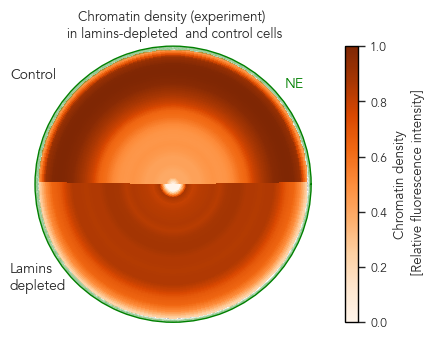

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import scipy.stats as stats
import scipy as sp
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

from scipy.interpolate import interp1d

mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['lines.linewidth']= 1
mpl.rcParams['mathtext.default'] = 'regular'
mpl.rcParams['axes.edgecolor'] = 'g'

plt.rcParams['pcolor.shading'] ='auto'



rad = np.arange(0, 105, 5)
rad_int = np.arange(0, 100.5, 0.5)

theta = np.radians(np.linspace(0, 180, 100))
theta1 = np.radians(np.linspace(0, -180, 100))

r, th = np.meshgrid(rad_int, theta)
r, th1 = np.meshgrid(rad_int, theta1)



prob =np.loadtxt("WT_Bondar.csv")
prob1 =np.loadtxt("MUT_Bondar.csv")


fac = interp1d(rad, prob, kind='linear')
fac1 = interp1d(rad, prob1, kind='linear')

prob_int=fac(rad_int)
prob_int1=fac1(rad_int)

prob_int11=fac1(80)

values=np.zeros((theta.size, prob_int.size))
values1=np.zeros((theta1.size, prob_int1.size))      
         
        
for i in range(theta.size):
    for j in range(prob_int.size):
        values[i][j] =prob_int[j]
        
        
for i in range(theta1.size):
    for j in range(prob_int1.size):
        values1[i][j] =prob_int1[j]       
        
        

fig, ax512 = plt.subplots(subplot_kw=dict(polar=True),figsize=(17.8/2.54, 0.5*17.8/2.54))

plt.xticks([], [])
ax512.set_rlabel_position(0)
ax512.set_ylim(0,103)

ax512.set_yticks(np.arange(25,100.01,25))
ax512.tick_params(axis='y', colors='white')

ax512.text(-10, 145, 'Control', fontdict=None )
ax512.text(10, 145, 'Lamins\ndepleted', fontdict=None )
ax512.text(7, 110, 'NE', fontdict=None, color='g')
plt.title("Chromatin density (experiment) \n in lamins-depleted  and control cells")

plt.pcolormesh(th, r, values,cmap = 'Oranges')
plt.pcolormesh(th1, r, values1,cmap = 'Oranges')

ax512.grid(color='grey', linestyle='dashed', linewidth=0.5)

cbar=plt.colorbar()
cbar.outline.set_color('black')
cbar.set_label("Chromatin density\n [Relative fluorescence intensity]")
plt.clim(0,1)
plt.tight_layout()

r1=102
rads = np.arange(0, (2 * np.pi), 0.01)
for rad11 in rads:
    ax512.plot(rad11, r1, 'g.',linewidth=100, alpha=0.1)
    

plt.savefig('Plot_Expr_interp.png', dpi=600, transparent=False)

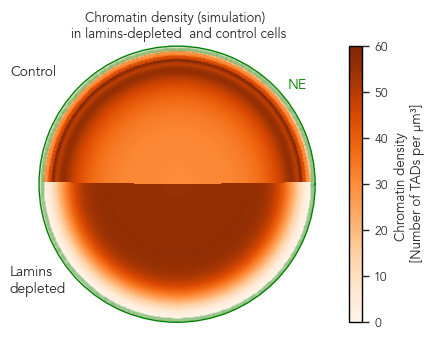

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import scipy.stats as stats
import scipy as sp
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
from scipy.interpolate import interp1d

mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['lines.linewidth']= 1
mpl.rcParams['mathtext.default'] = 'regular'
mpl.rcParams['axes.edgecolor'] = 'g'

rad = np.arange(0.01, 2.1, 0.01)
theta = np.radians(np.linspace(0, 180, 100))
theta1 = np.radians(np.linspace(0, -180, 100))

r, th = np.meshgrid(rad, theta)
r, th1 = np.meshgrid(rad, theta1)


prob =np.loadtxt("WT_avr_denst.csv")
prob1 =np.loadtxt("MUT_avr_denst.csv")

values=np.zeros((theta.size, prob.size))
values1=np.zeros((theta.size, prob.size))
 


for i in range(theta.size):
    for j in range(prob.size):
        values[i][j] =prob[j]
        
for i in range(theta1.size):
    for j in range(prob1.size):
        values1[i][j] =prob1[j]


fig, ax514 = plt.subplots(subplot_kw=dict(polar=True),figsize=(17.8/2.54, 0.5*17.8/2.54))



plt.xticks([], [])

ax514.set_rlabel_position(0)


ax514.set_ylim(0,2.08)

ax514.set_yticks(np.arange(0.5,2.001,0.5))
ax514.tick_params(axis='y', colors='white')


ax514.text(-10, 3.0, 'Control', fontdict=None )
ax514.text(10, 3.0, 'Lamins\ndepleted', fontdict=None )
ax514.text(7, 2.2, 'NE', fontdict=None, color='g')
plt.title("Chromatin density (simulation) \n in lamins-depleted  and control cells")

plt.pcolormesh(th, r, values,cmap = 'Oranges', shading='auto')
plt.pcolormesh(th1, r, values1,cmap = 'Oranges', shading='auto')


ax514.grid(color='grey', linestyle='dashed', linewidth=0.5)

cbar=plt.colorbar()
cbar.outline.set_color('black')
cbar.set_label("Chromatin density \n [Number of TADs per \u03BCm\u00b3]")
plt.clim(0,60)
plt.tight_layout()

r1=2.04
rads = np.arange(0, (2 * np.pi), 0.01)
for rad11 in rads:
    ax514.plot(rad11, r1, 'g.',linewidth=100, alpha=0.1)
    
plt.savefig('Plot_Sim.png', dpi=600, transparent=False)
#plt.show()
